In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


from collections import Counter

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('nba_2013.csv')

In [3]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [6]:
df.head(10)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,2,13,0.153846,132,287,0.459930,0.450,33,50,0.660,119,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,116,309,0.375405,124,234,0.529915,0.549,105,116,0.905,23,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,11,47,0.234043,193,366,0.527322,0.507,76,121,0.628,79,129,208,94,90,19,90,121,495,2013-2014,2013


In [7]:
df = df.fillna(0)

<Axes: xlabel='count', ylabel='pos'>

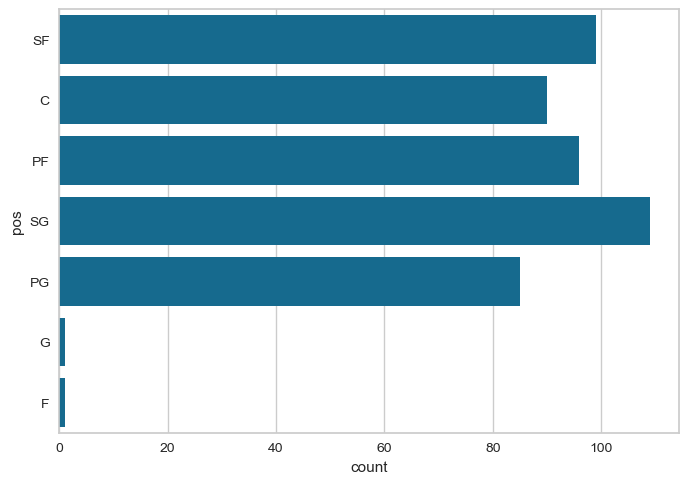

In [8]:
sns.countplot(df['pos'])

<Axes: xlabel='count', ylabel='bref_team_id'>

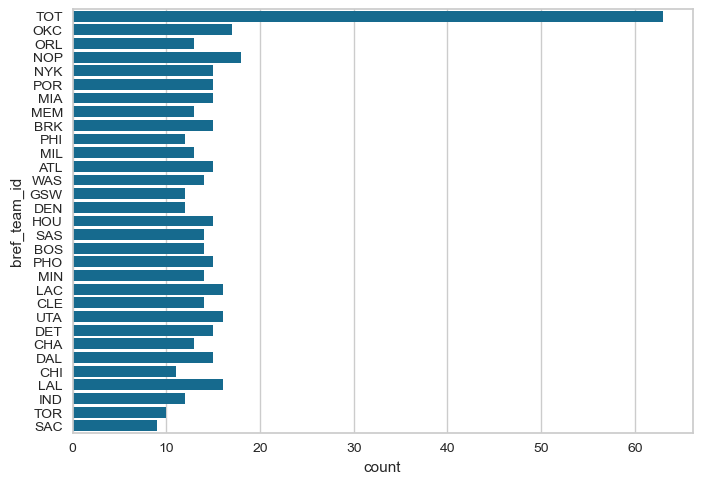

In [9]:
sns.countplot(df['bref_team_id'])


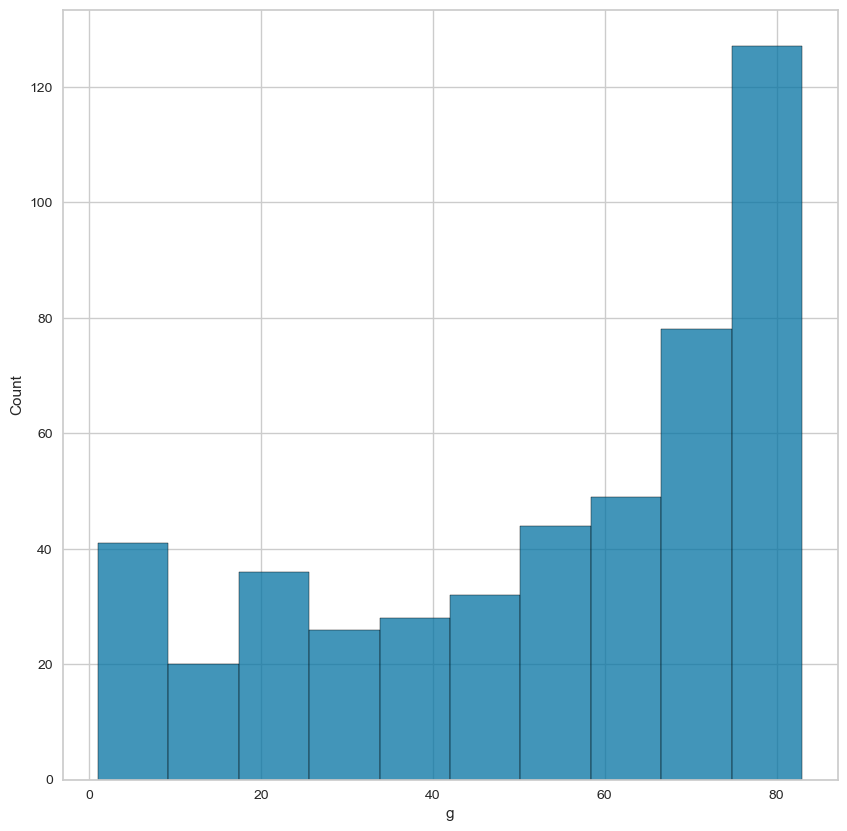

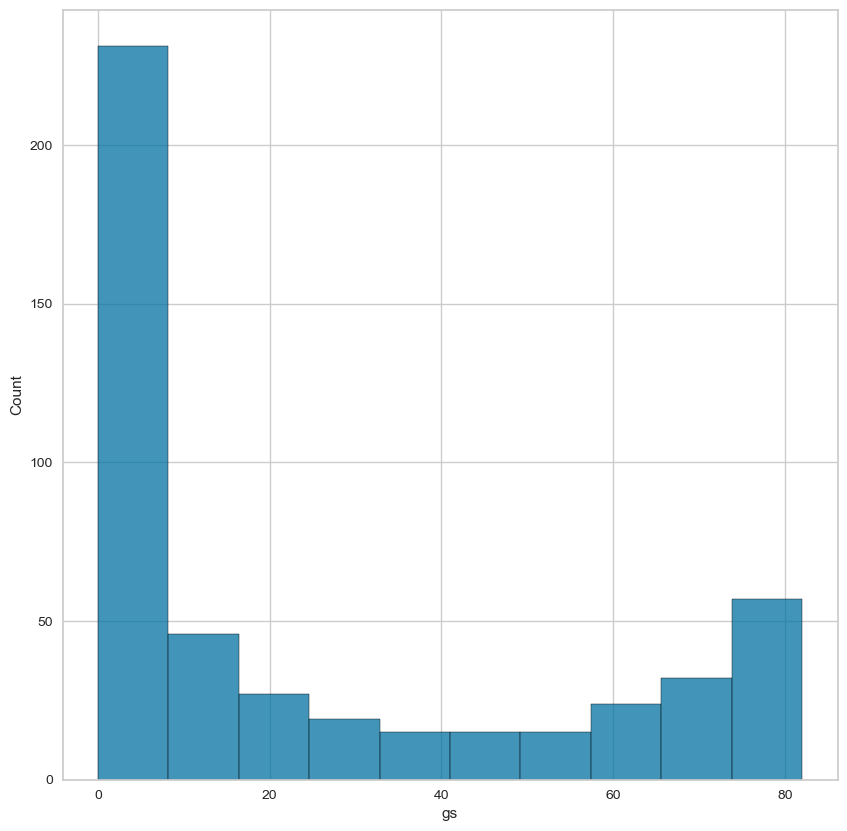

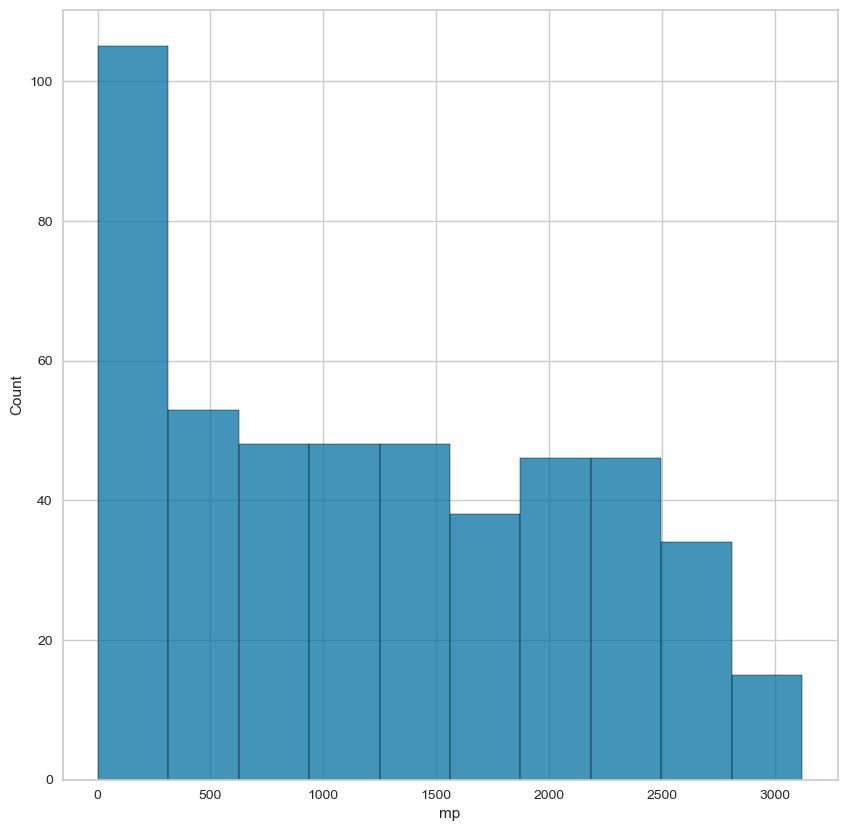

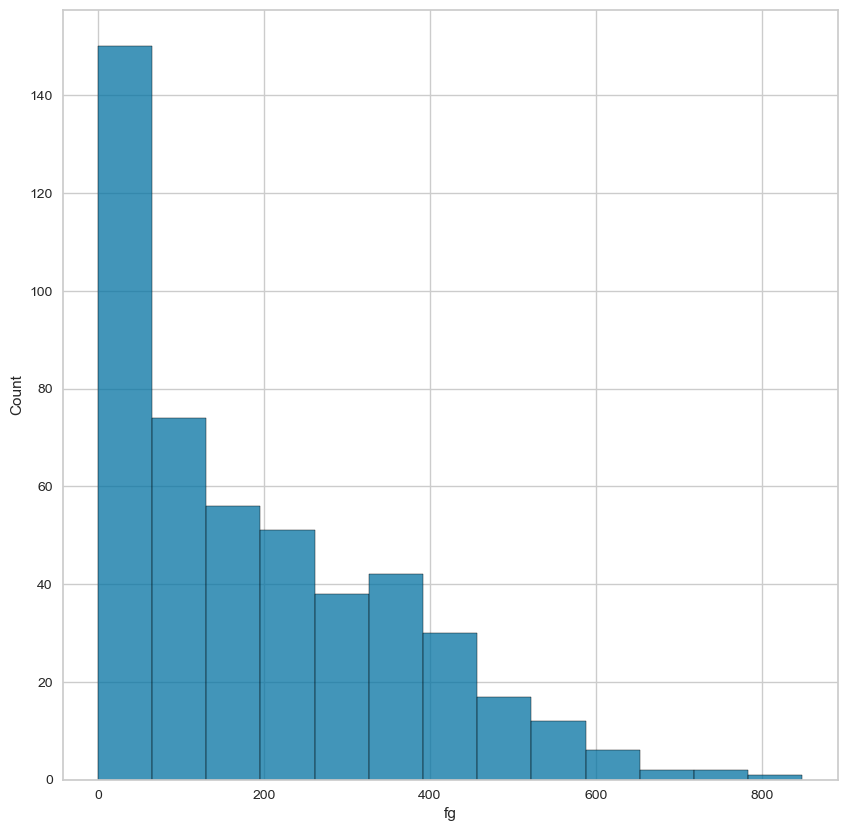

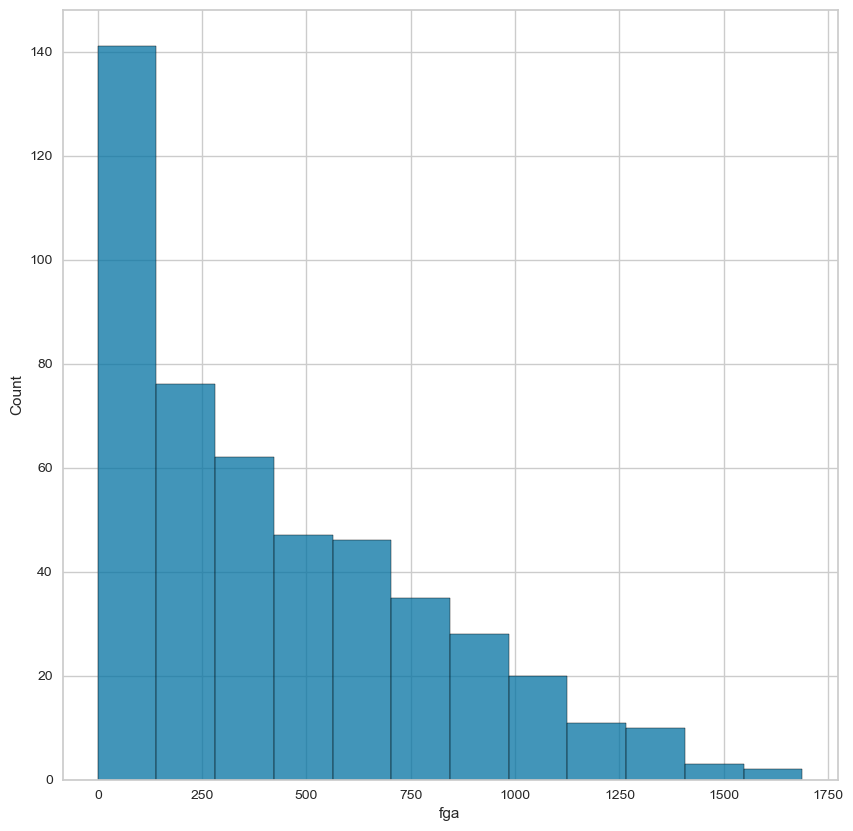

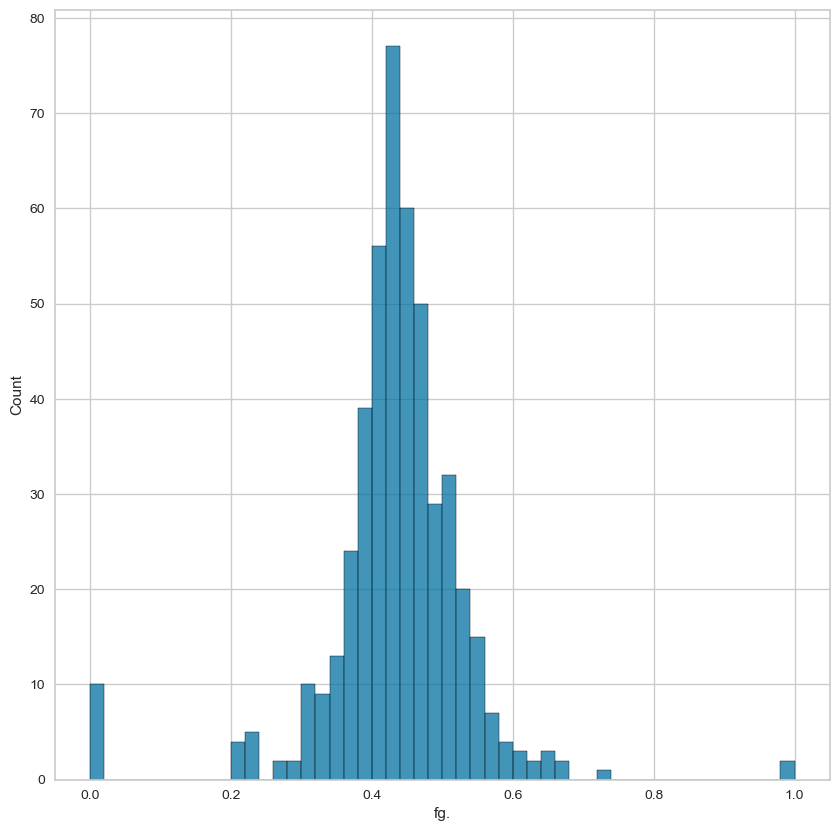

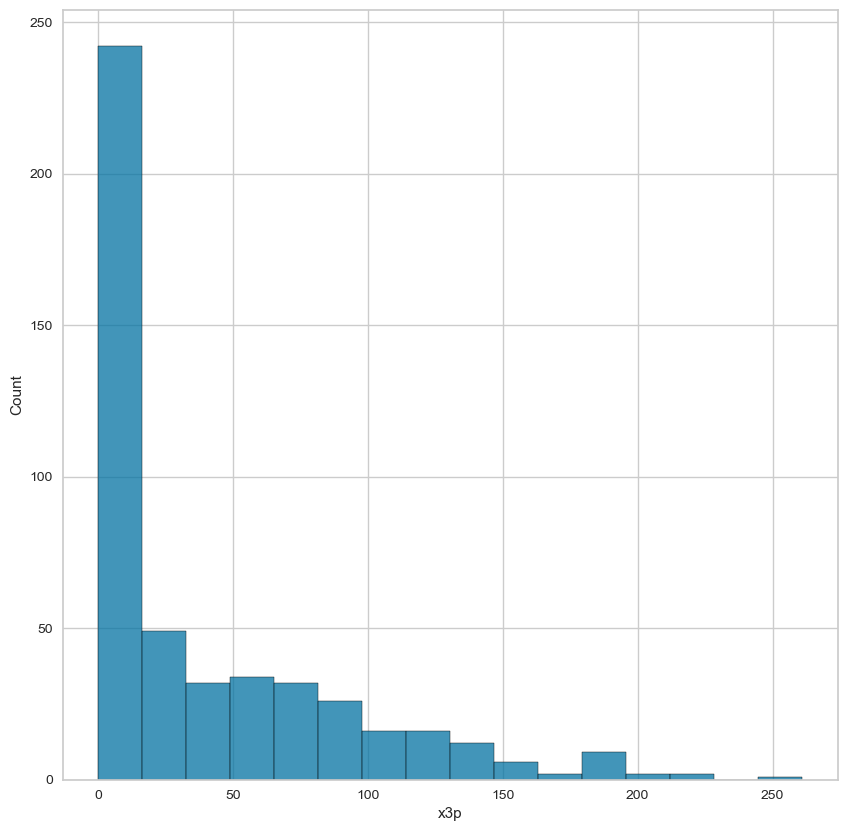

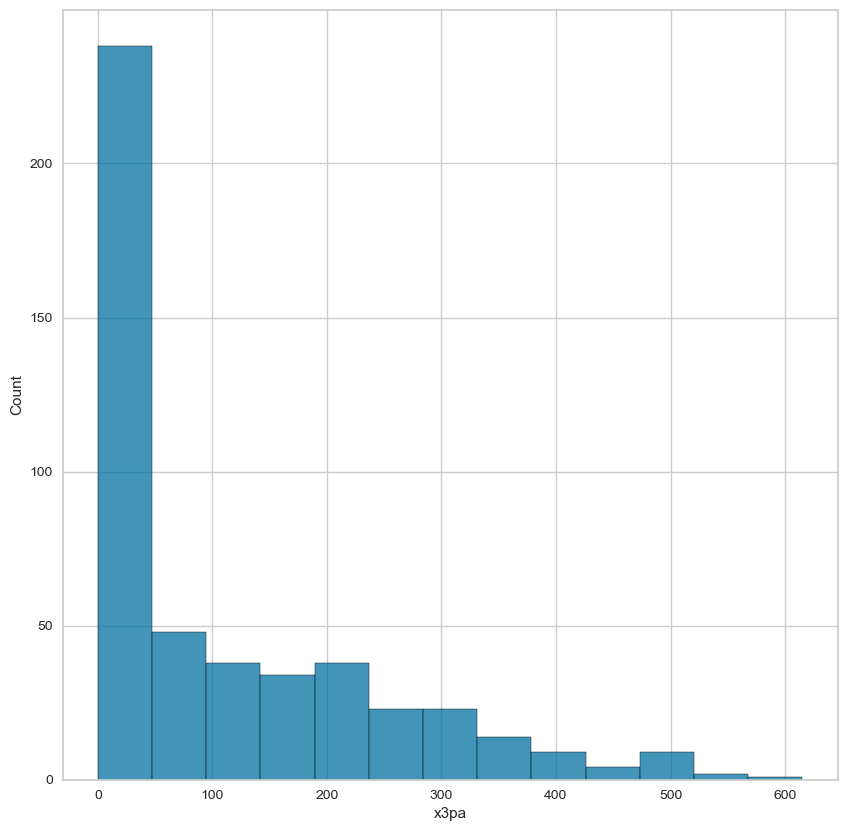

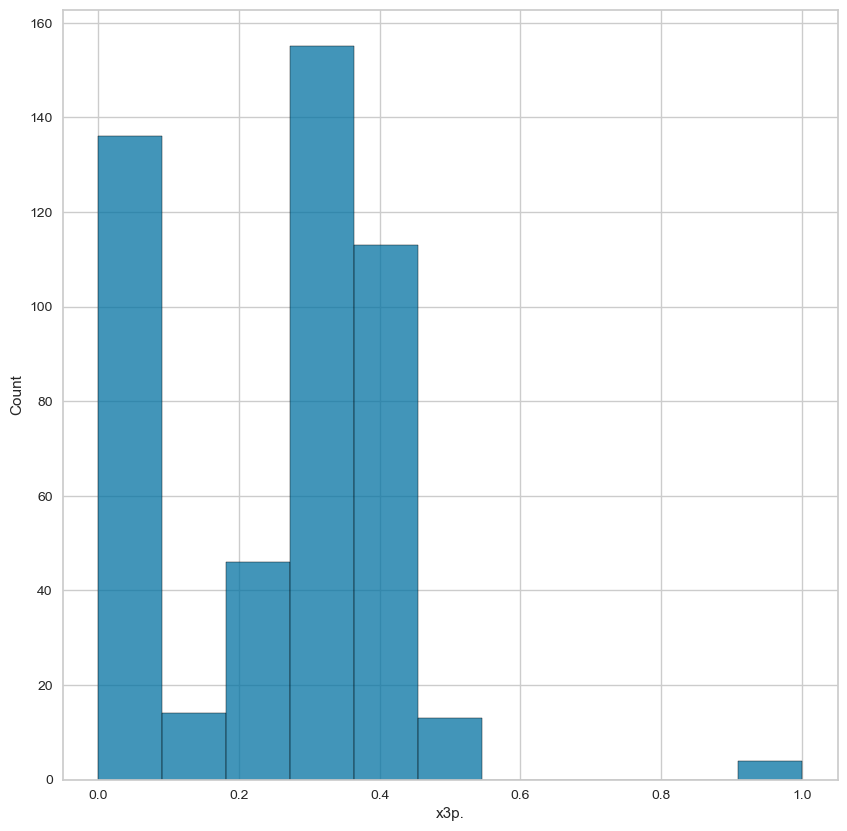

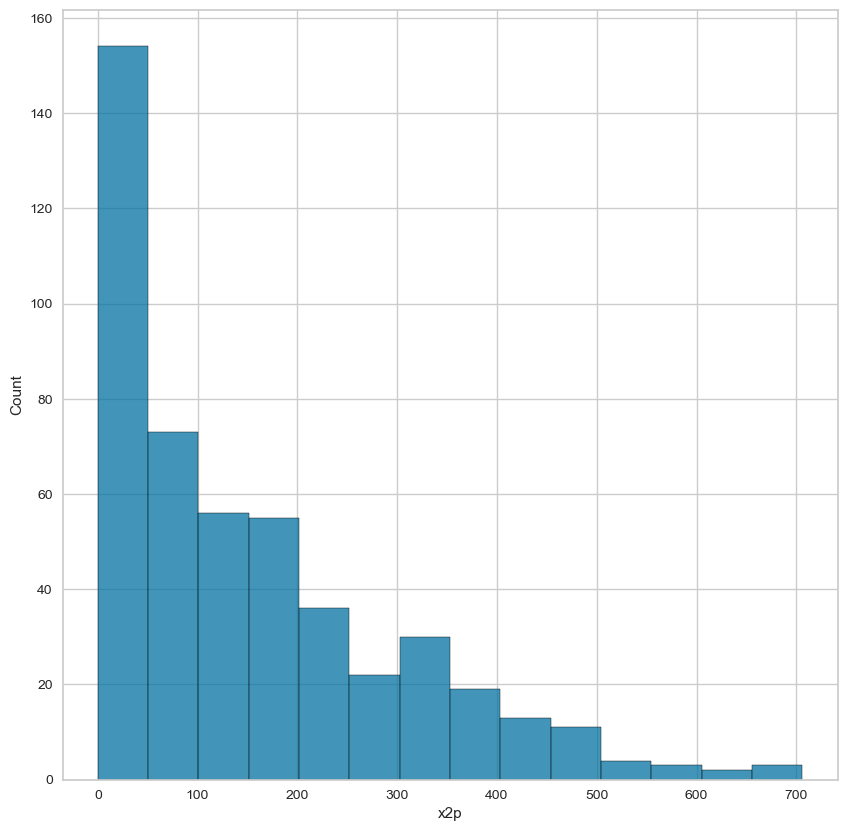

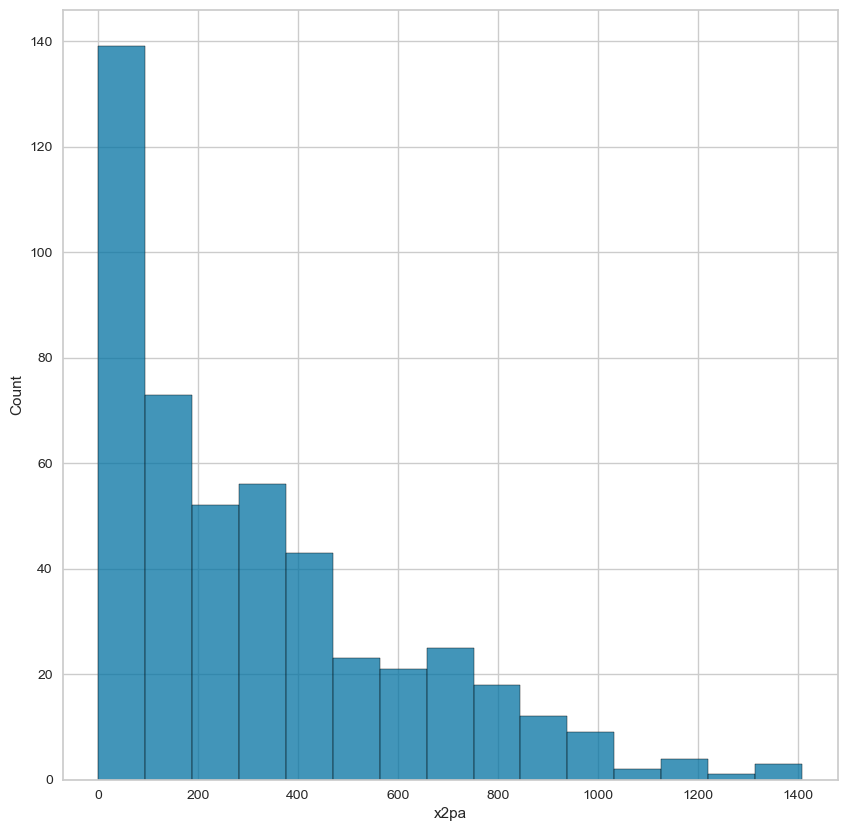

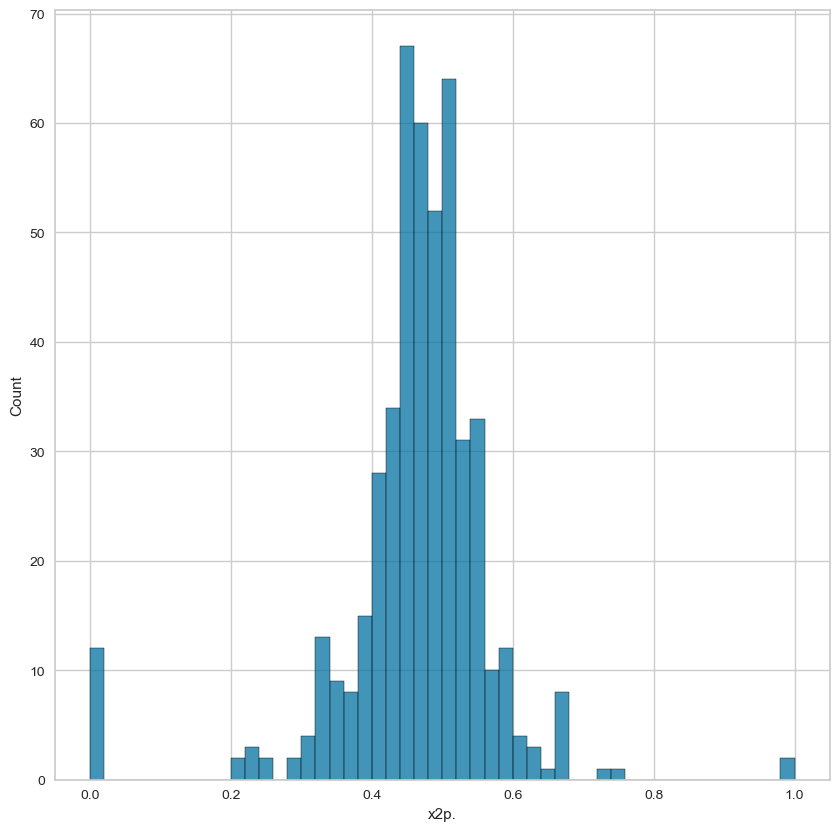

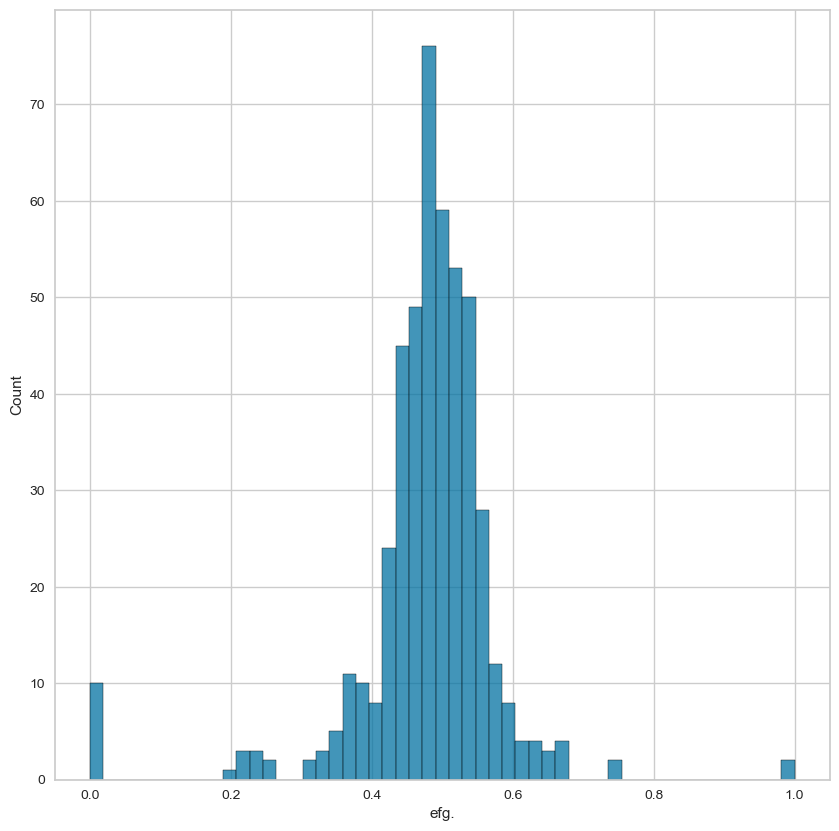

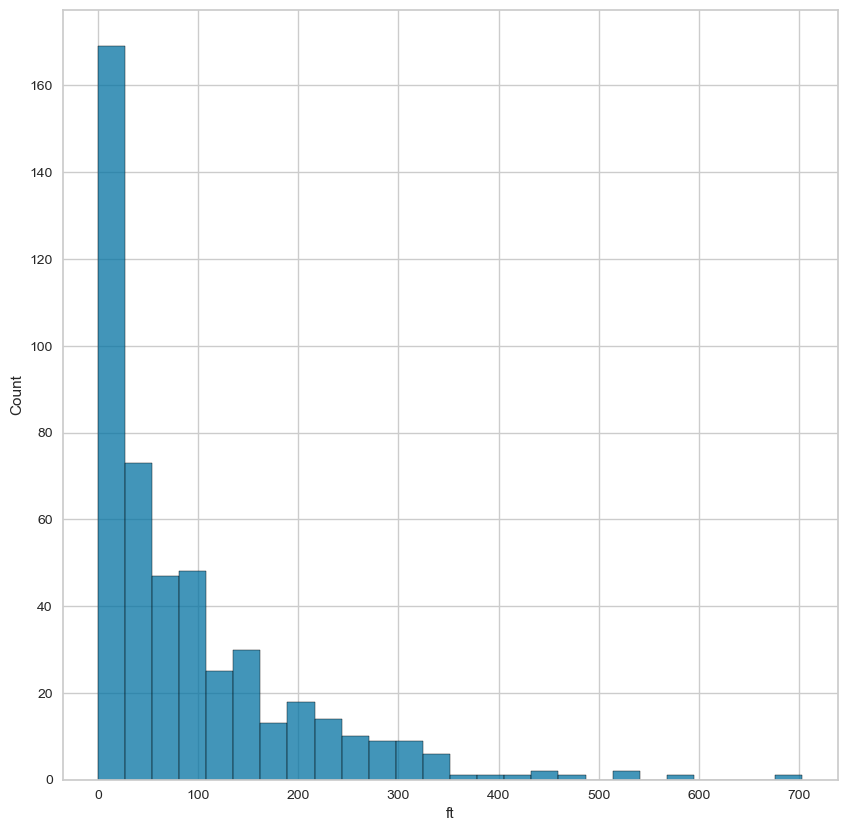

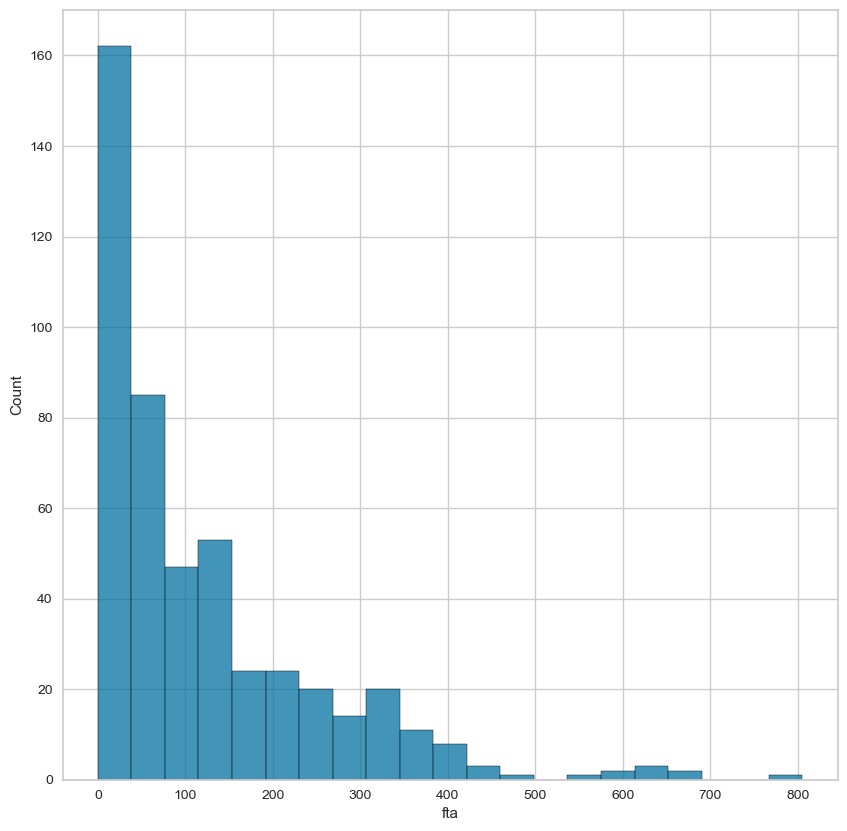

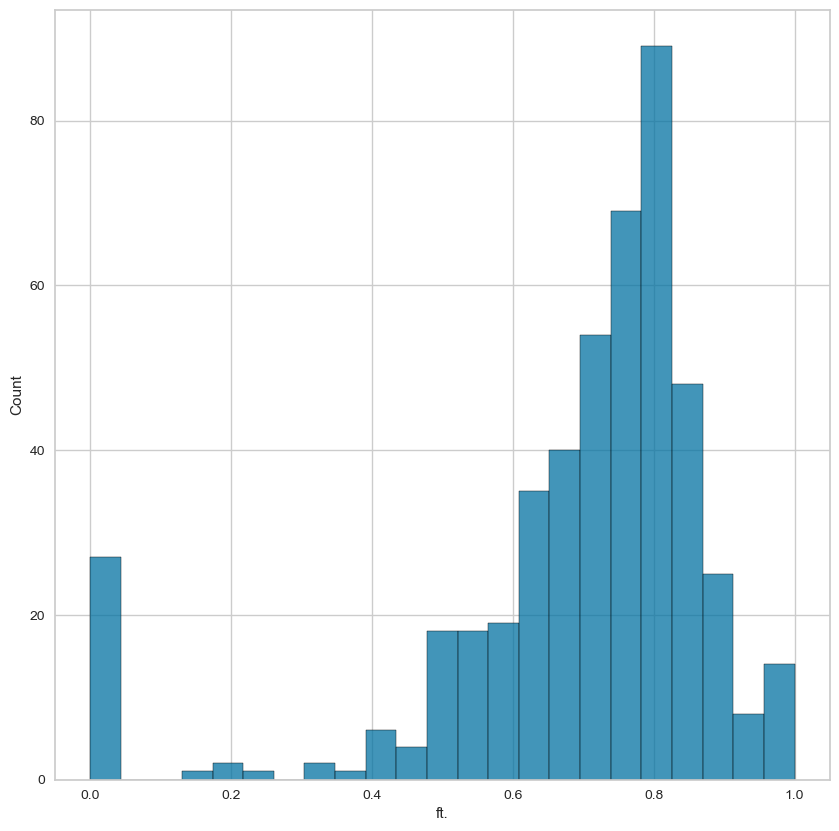

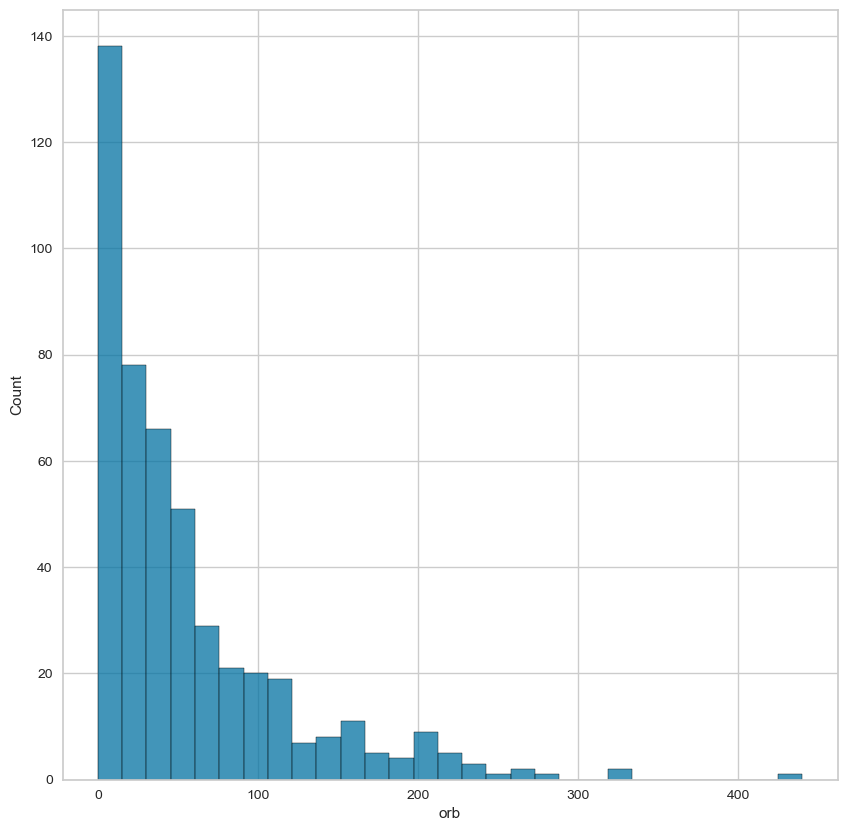

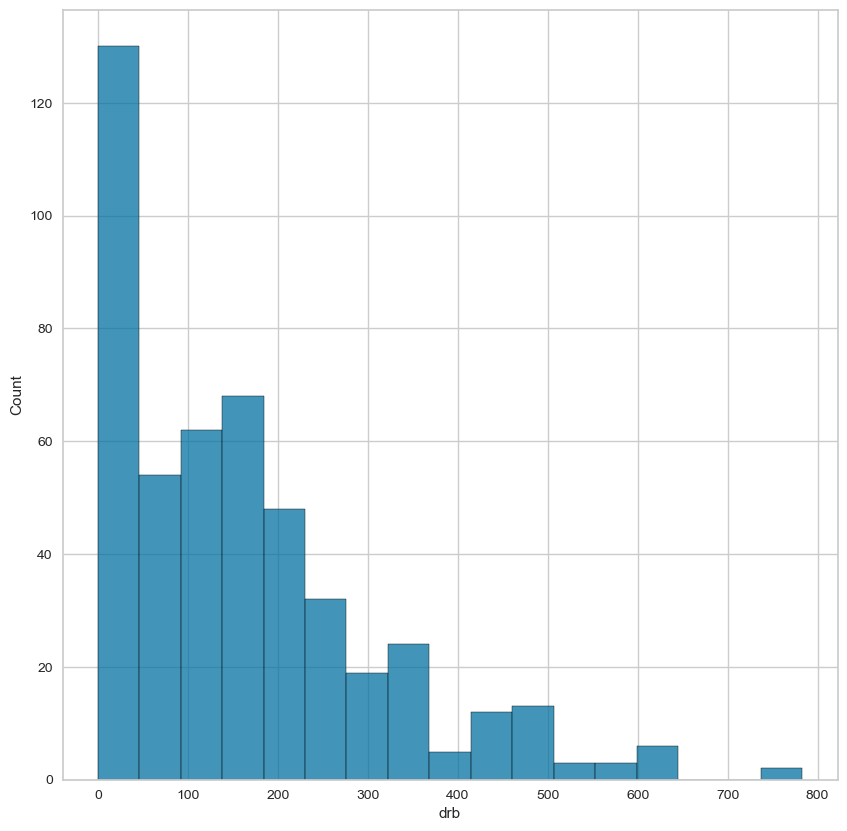

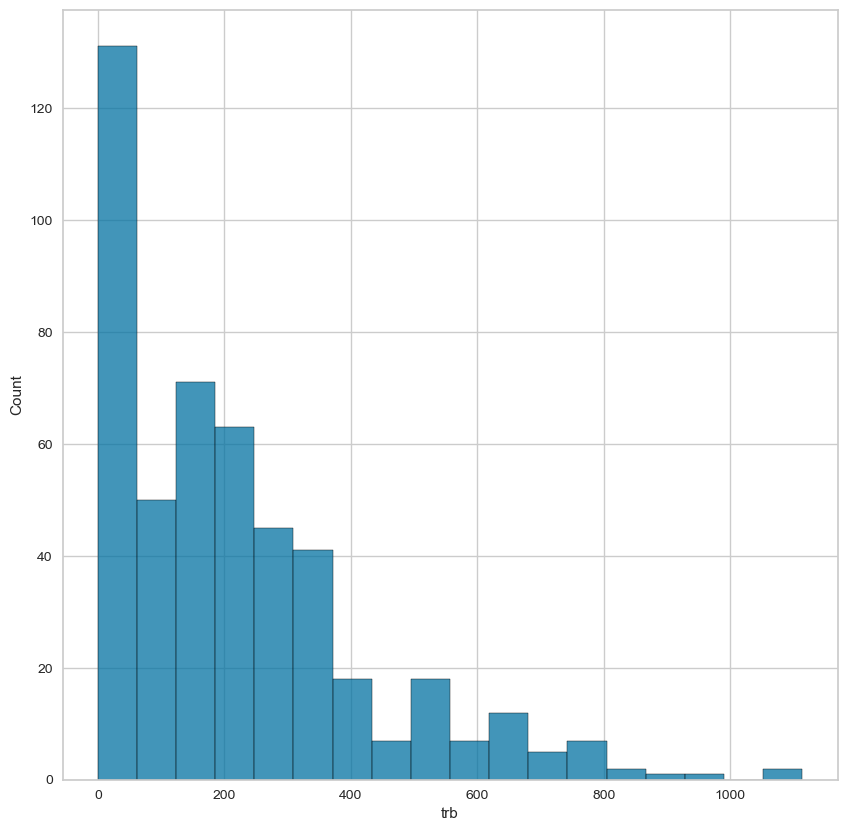

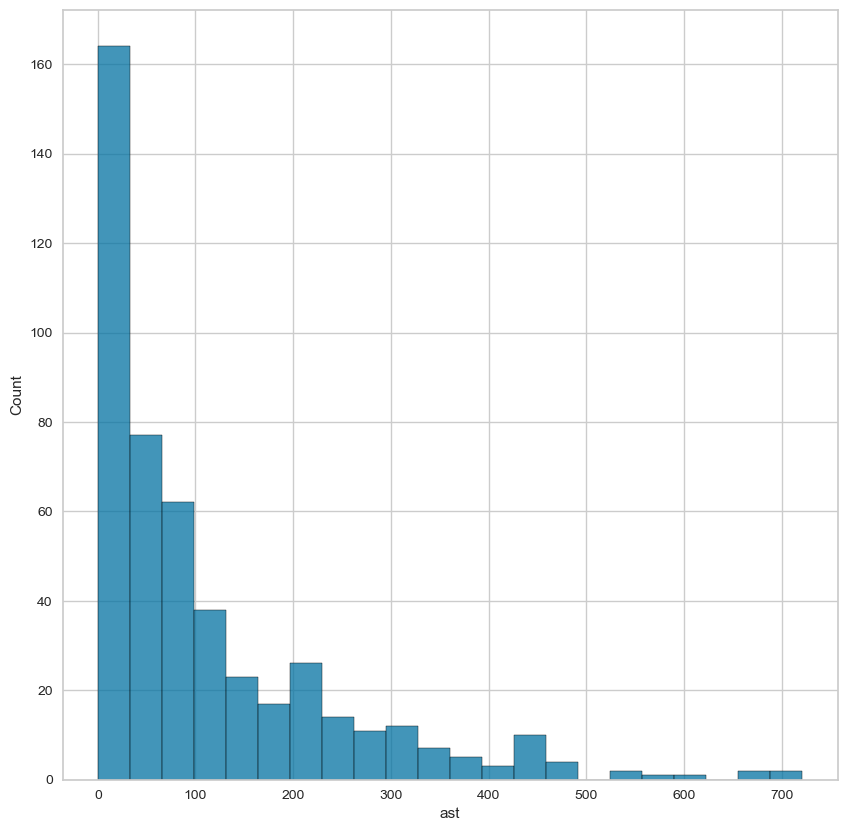

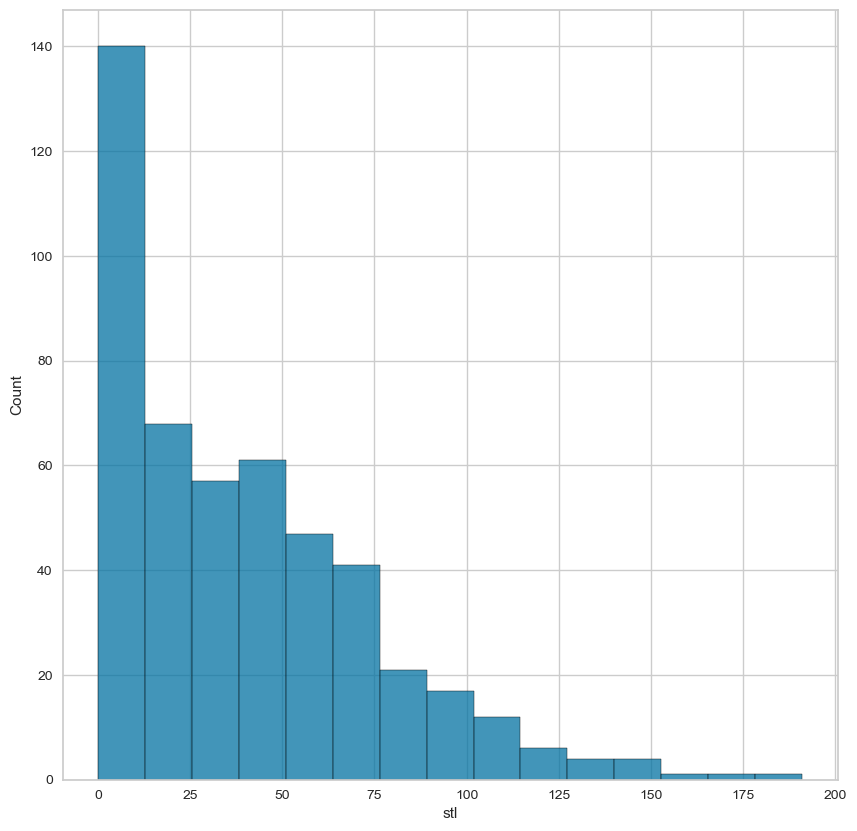

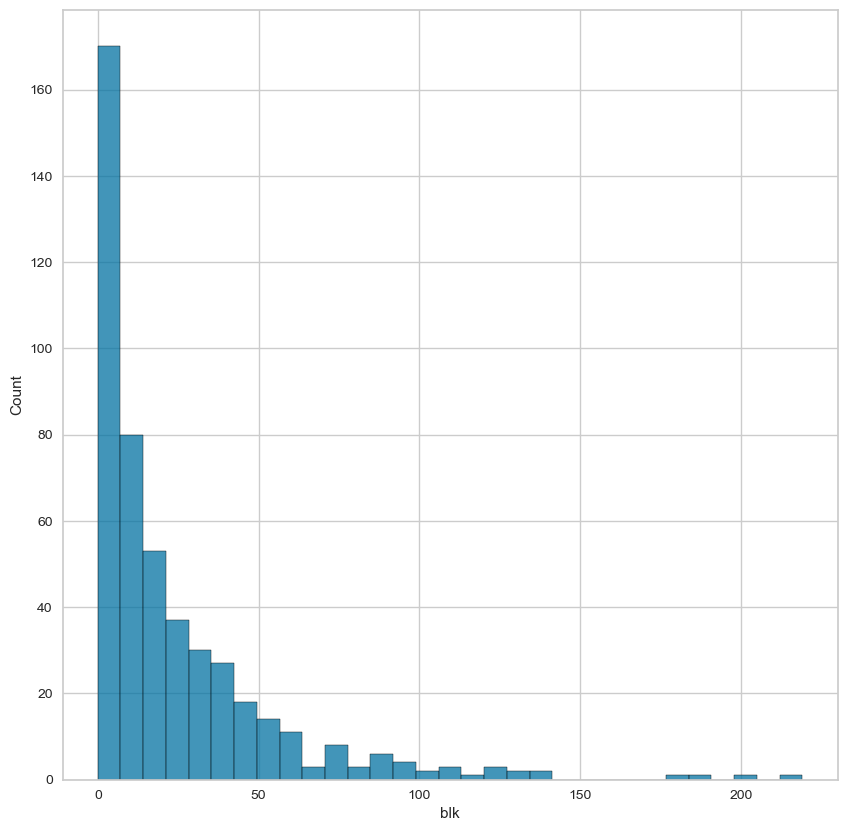

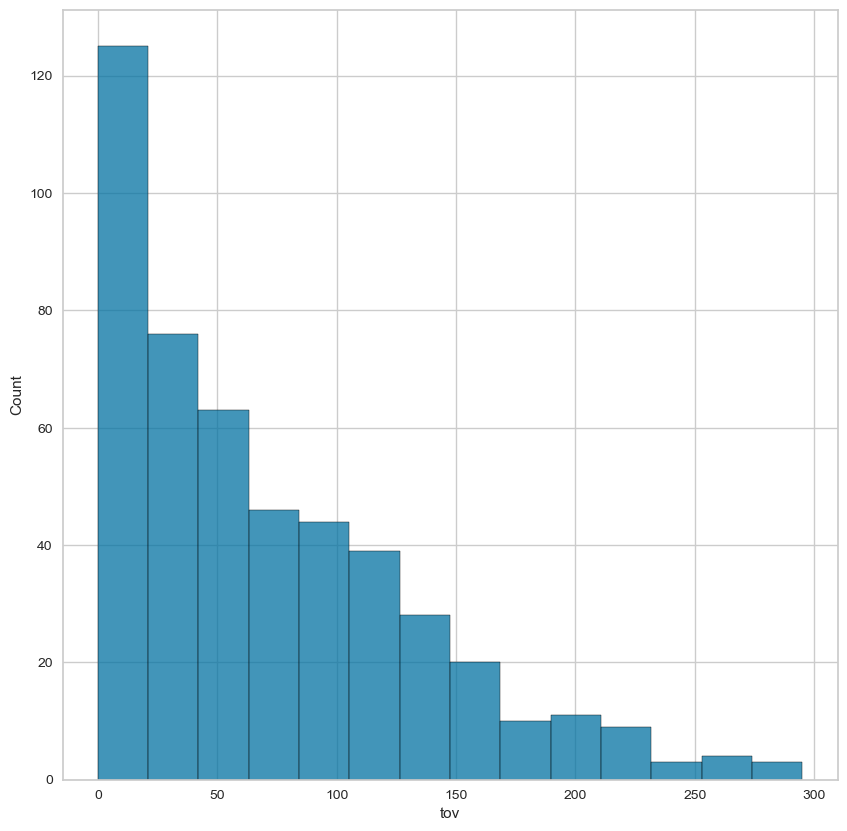

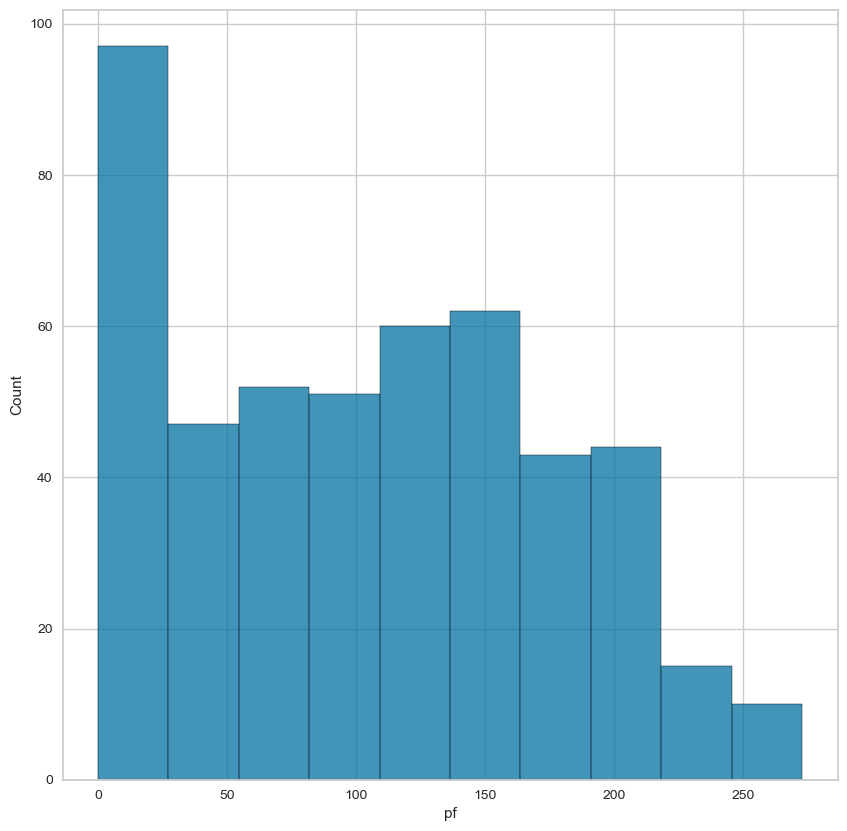

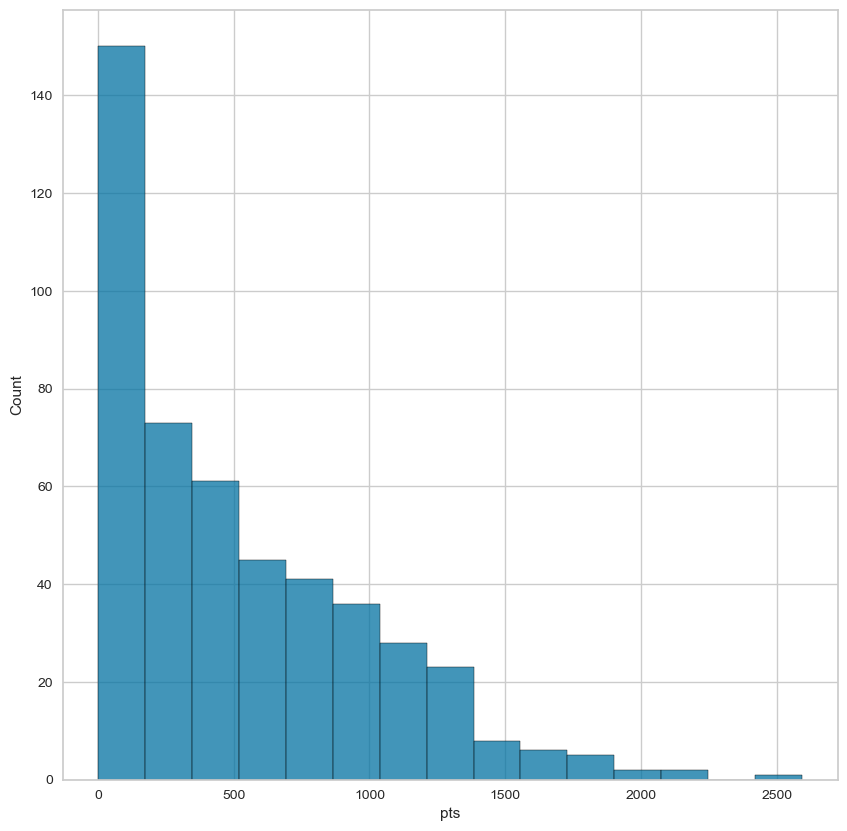

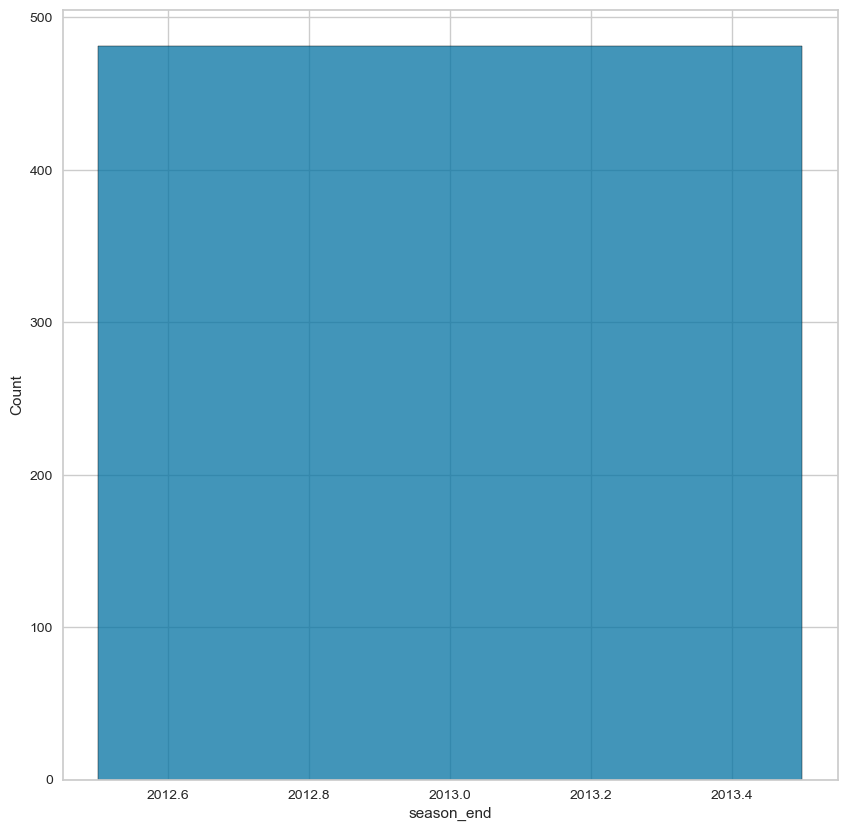

In [10]:
for i in ['g', 'gs', 'mp', 'fg', 'fga','fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
        'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
        'pts', 'season_end']:
  plt.figure(figsize=(10,10))
  sns.histplot(df[i])

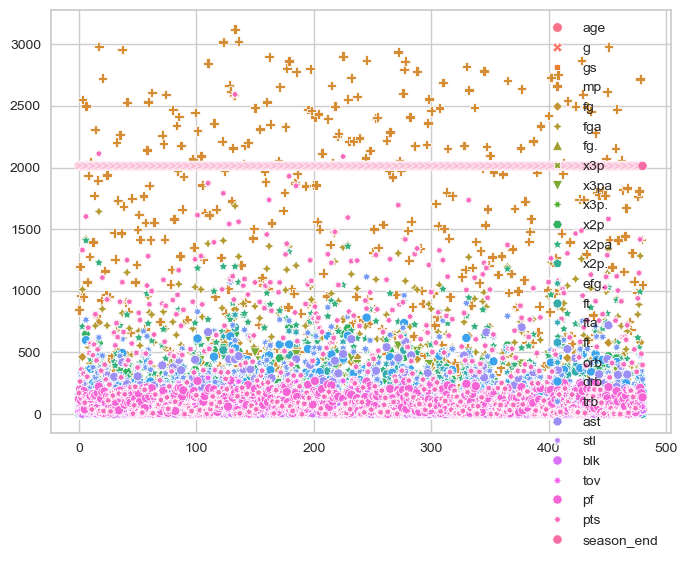

In [11]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

sns.scatterplot(numerical_columns)
plt.show()


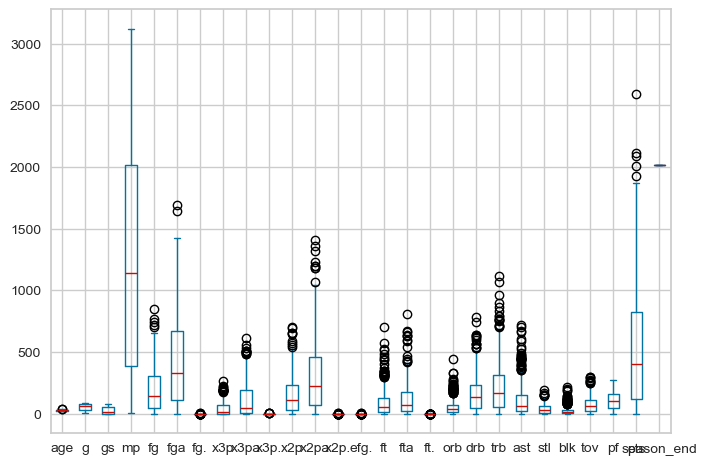

In [12]:
numerical_columns.plot(kind='box')
None


<Axes: >

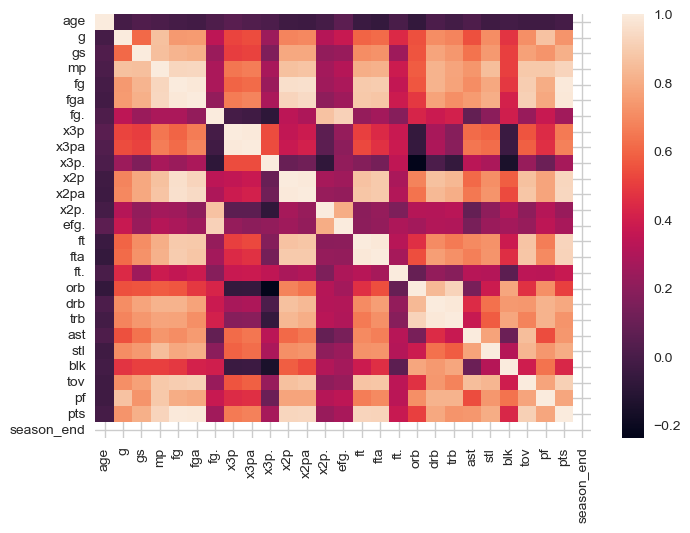

In [13]:
corr = df.corr()
sns.heatmap(corr)

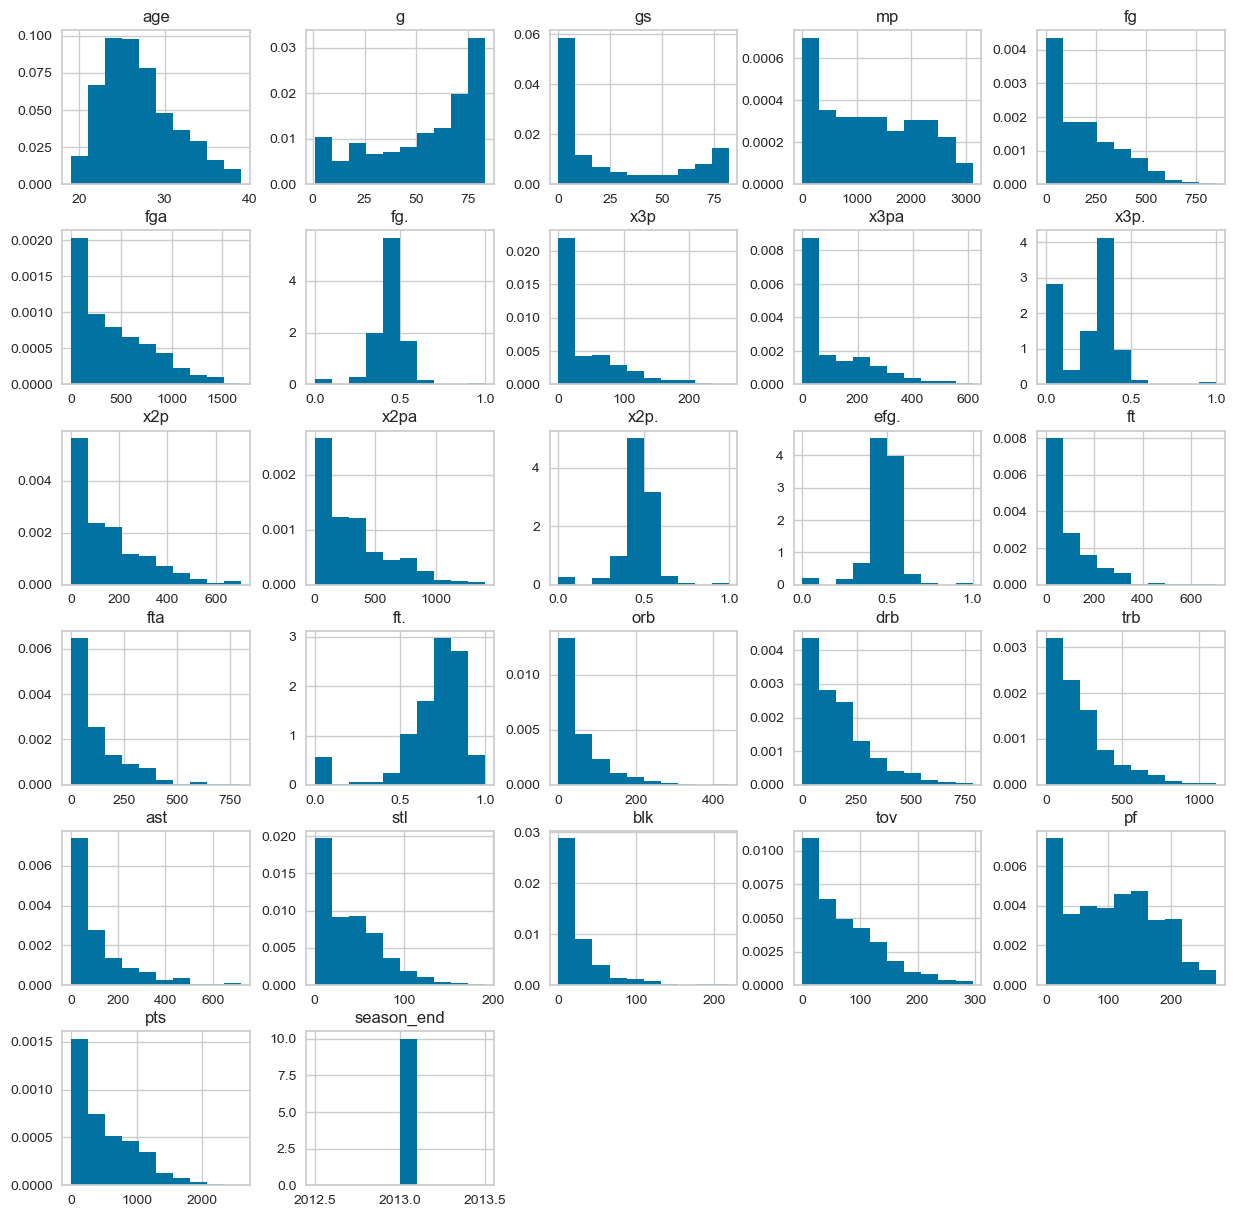

In [14]:
hs1 = df.hist(figsize=(15,15), density=True)

plt.show()

In [15]:
X= df.drop(['player','pos', 'bref_team_id', 'season'],axis = 1 )

In [16]:
ss = StandardScaler()

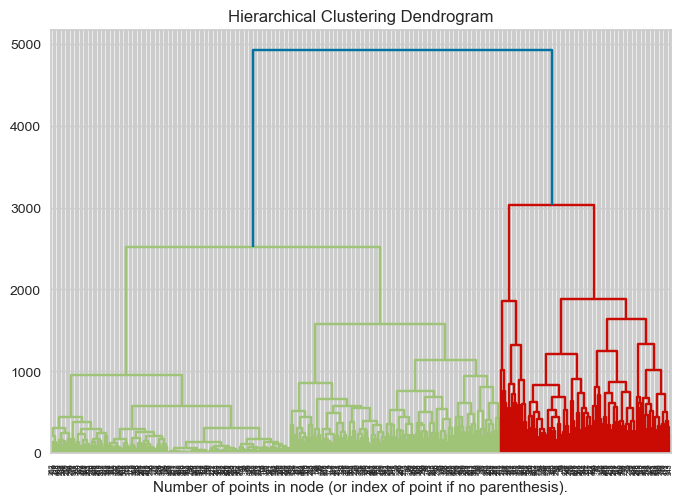

In [17]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [18]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
cluster.fit_predict(X)


array([0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [19]:
df['cluster'] = cluster.labels_

In [20]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,cluster
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,0
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.000000,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,0
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.000000,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,0
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,1
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,0


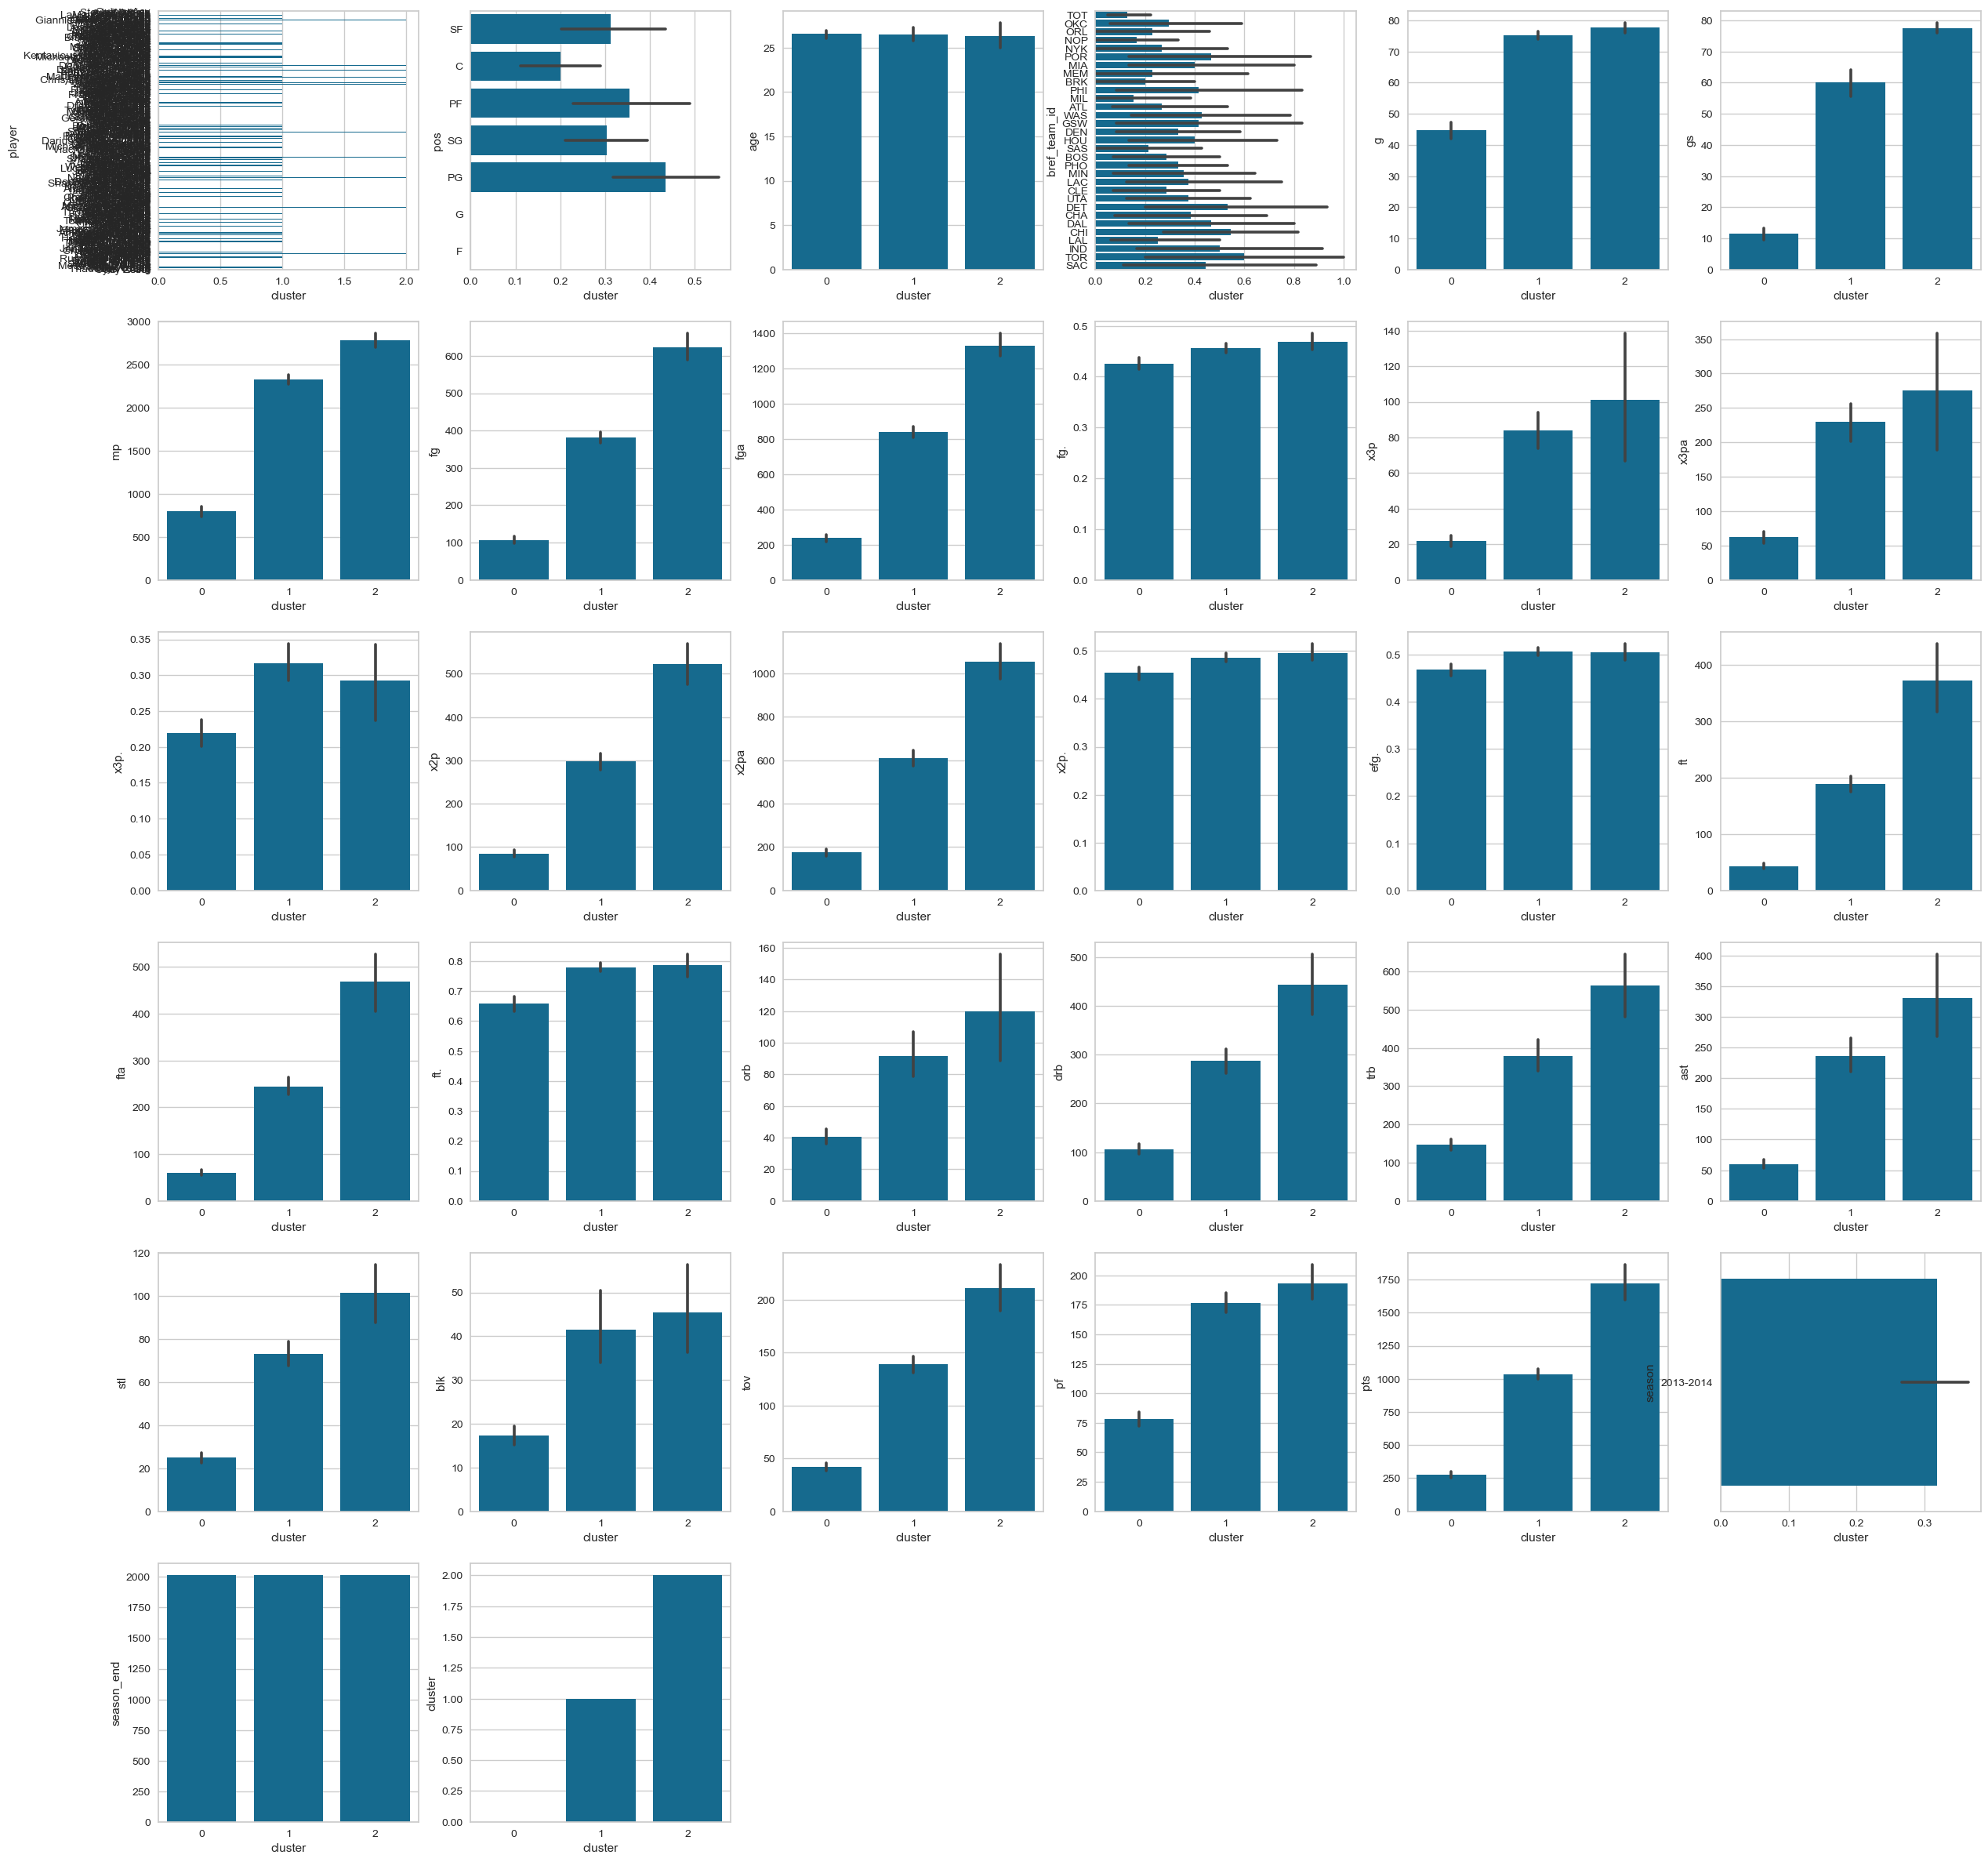

In [21]:
columns = list(df)

'''plotting: barplot'''
plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(6, 6, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    sns.barplot(x = df['cluster'], y = df[column], ax=ax)

plt.show()

In [22]:
cluster_labels = {}

for label in df['cluster'].unique():
    cluster_df = df[df['cluster'] == label]
    avg_age = cluster_df['age'].mean()
    dominant_nationality = cluster_df['pos'].mode()[0]
    
    cluster_labels[label] = f'Cluster {label} - Average Age: {avg_age:.2f}, Dominant Position: {dominant_nationality}'


In [23]:
cluster_labels

{0: 'Cluster 0 - Average Age: 26.52, Dominant Position: SG',
 1: 'Cluster 1 - Average Age: 26.50, Dominant Position: PG',
 2: 'Cluster 2 - Average Age: 26.29, Dominant Position: PF'}

In [24]:
for label, group in df.groupby('cluster'):
    print(f"Label {label}:")
    
    for name in group['player'].head(10):
        print(name)
    
    print()

Label 0:
Quincy Acy
Steven Adams
Jeff Adrien
Alexis Ajinca
Cole Aldrich
Lavoy Allen
Tony Allen
Al-Farouq Aminu
Louis Amundson
Chris Andersen

Label 1:
Arron Afflalo
Ray Allen
James Anderson
Trevor Ariza
D.J. Augustin
Harrison Barnes
Brandon Bass
Nicolas Batum
Bradley Beal
Marco Belinelli

Label 2:
LaMarcus Aldridge
Carmelo Anthony
DeMarcus Cousins
Stephen Curry
DeMar DeRozan
Kevin Durant
Monta Ellis
Rudy Gay
Paul George
Blake Griffin



In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X)

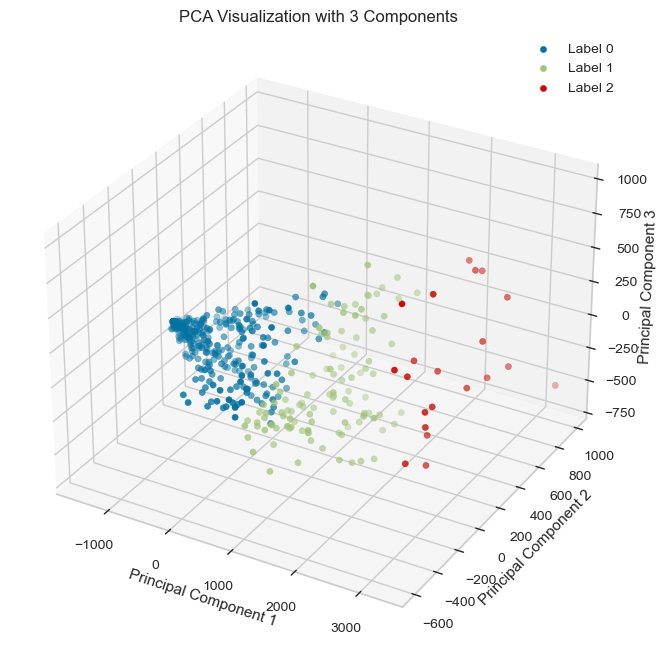

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df['cluster'].unique():
    indices = df[df['cluster'] == label].index
    ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('PCA Visualization with 3 Components')
plt.show()

In [28]:
loadings = np.abs(pca.components_)

most_important_indices = np.argmax(loadings, axis=1)

feature_names = df.columns

most_important_features = feature_names[most_important_indices]


In [29]:
most_important_features

Index(['bref_team_id', 'bref_team_id', 'ft.', 'orb', 'orb'], dtype='object')

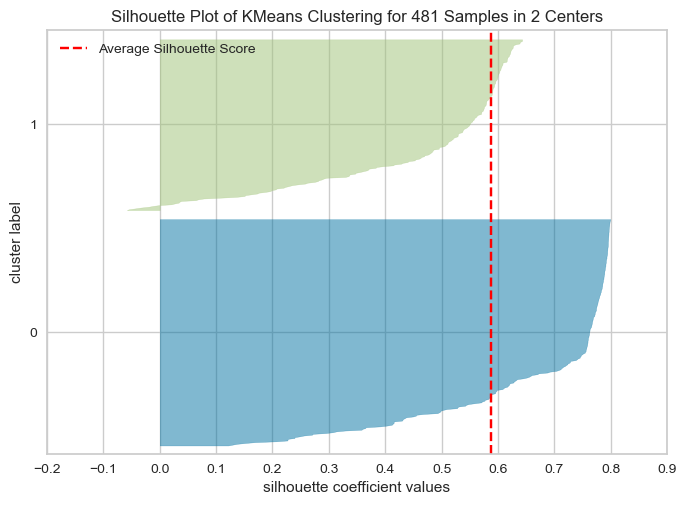

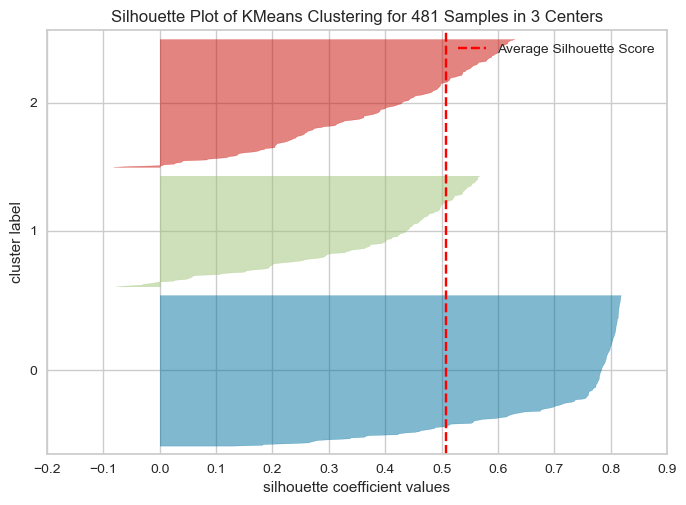

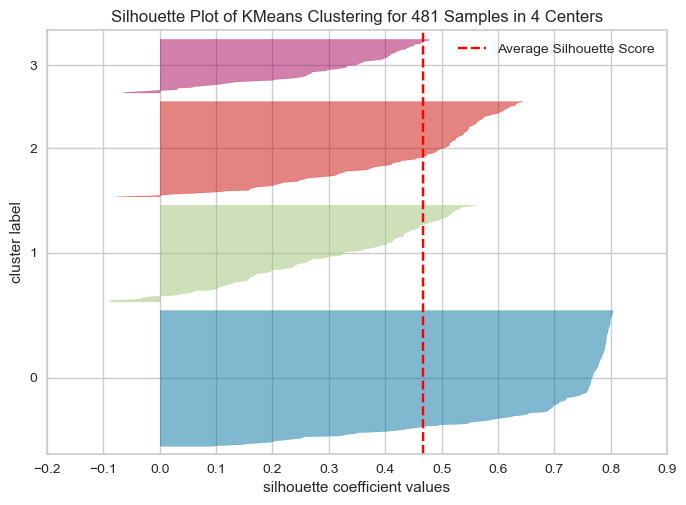

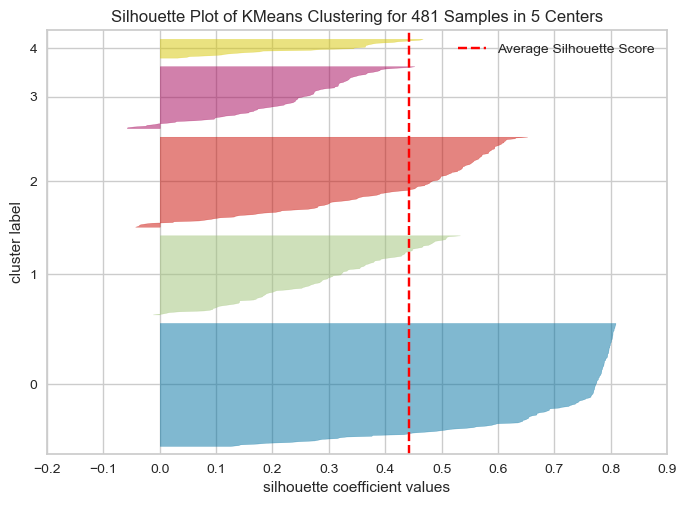

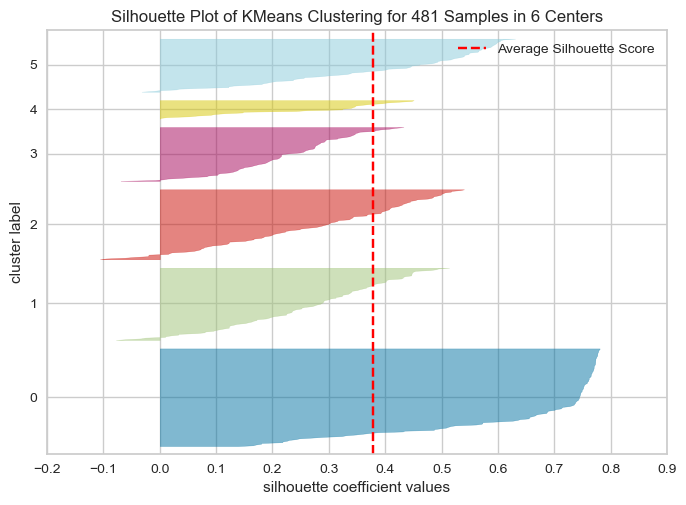

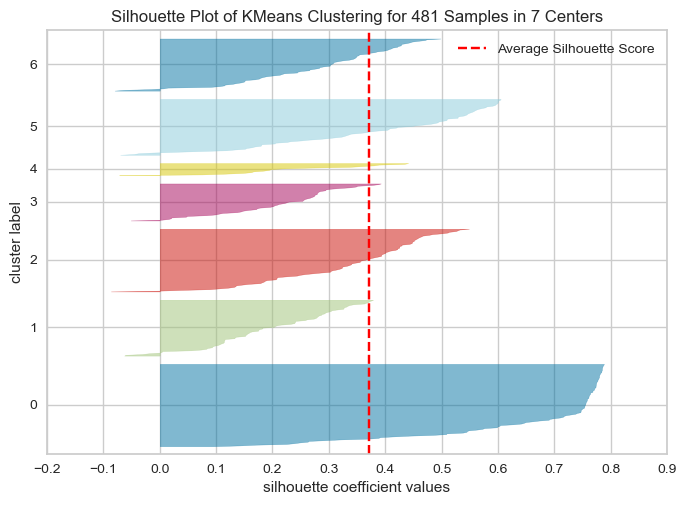

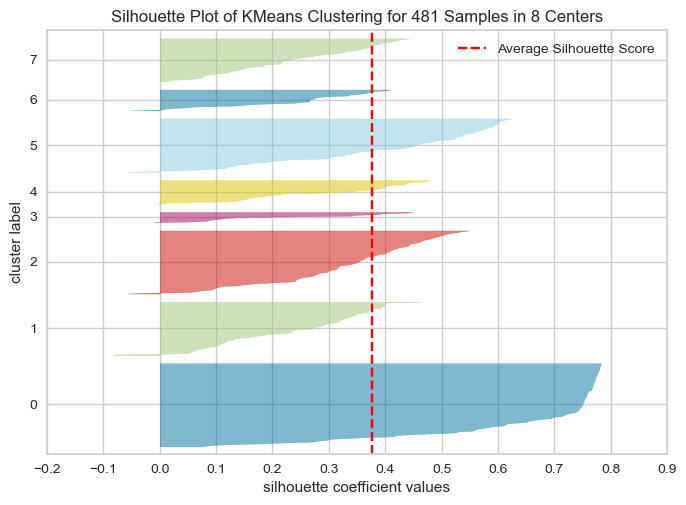

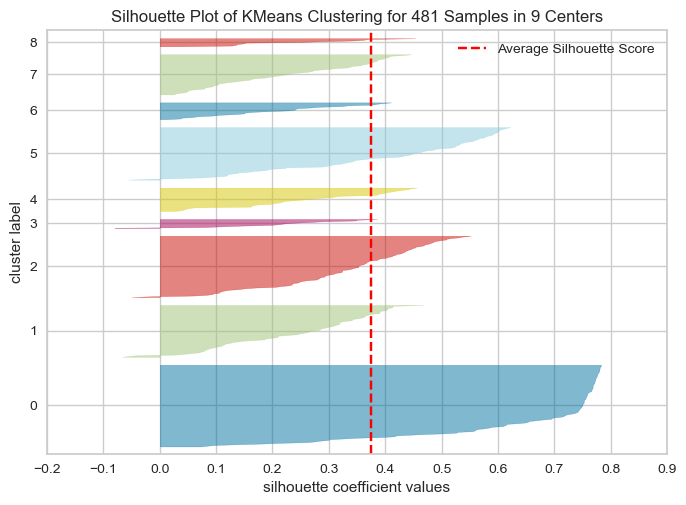

In [30]:
sillhouette_list= []
for i in range(2,10):  
    model_kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(X)
    silhouette_avg = silhouette_score(X, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)

(0.0, 1.0)

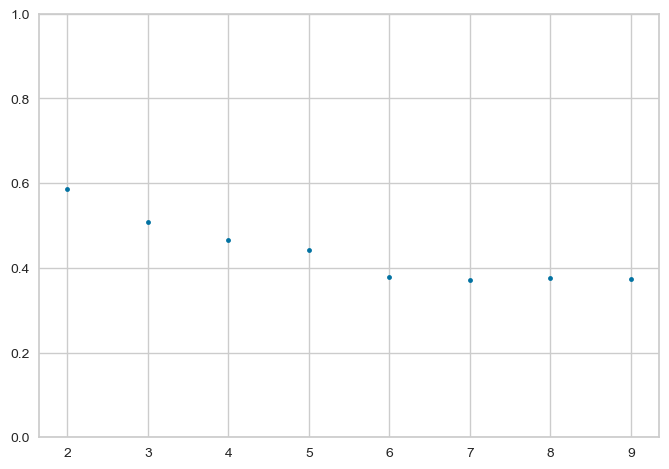

In [31]:
plt.plot([x for x in range(2,10)],sillhouette_list,linestyle='',marker='.')
plt.ylim([0,1])

In [32]:
inertia_values = []
for i in range(2,10): 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

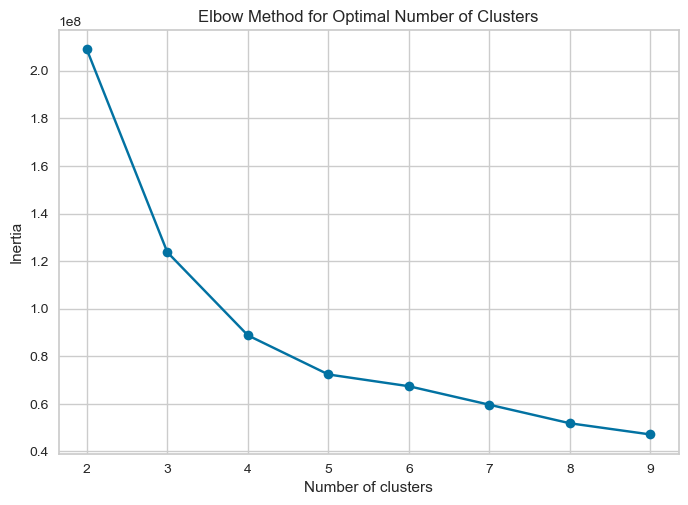

In [33]:
plt.plot(range(2,10), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

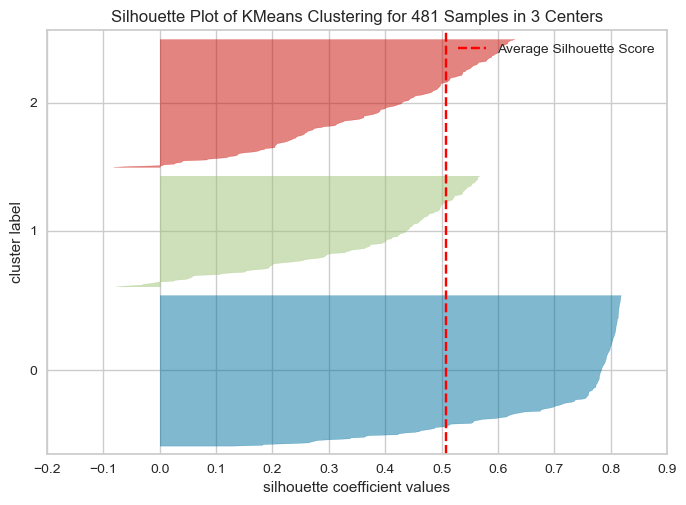

In [68]:
model_kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(X)
silhouette_avg = silhouette_score(X, model_kmeans.labels_)
visualizer.poof()
sillhouette_list.append(silhouette_avg)


In [69]:
df['label'] = model_kmeans.labels_

In [70]:
cluster_labels = {}

for label in df['label'].unique():
    cluster_df = df[df['label'] == label]
    avg_age = cluster_df['age'].mean()
    dominant_nationality = cluster_df['pos'].mode()[0]
    
    cluster_labels[label] = f'Cluster {label} - Average Age: {avg_age:.2f}, Dominant Position: {dominant_nationality}'


In [71]:
cluster_labels

{0: 'Cluster 0 - Average Age: 26.23, Dominant Position: SG',
 2: 'Cluster 2 - Average Age: 27.05, Dominant Position: PF',
 1: 'Cluster 1 - Average Age: 26.26, Dominant Position: PG'}

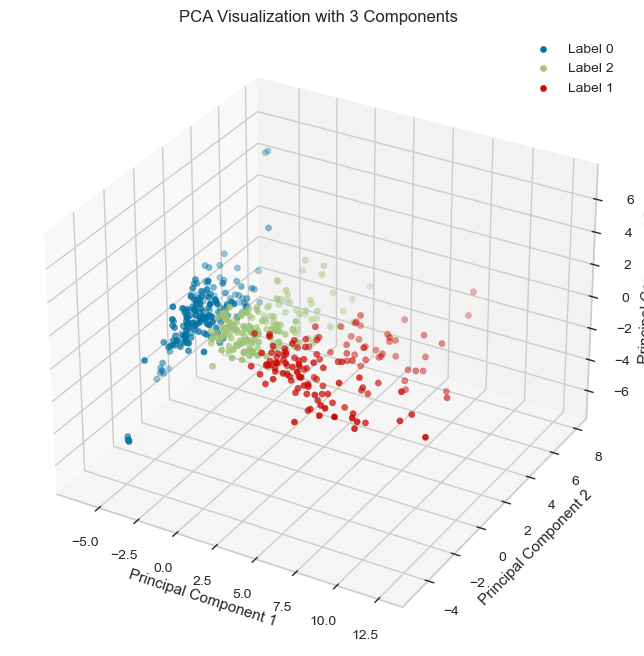

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df['label'].unique():
    indices = df[df['label'] == label].index
    ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('PCA Visualization with 3 Components')
plt.show()

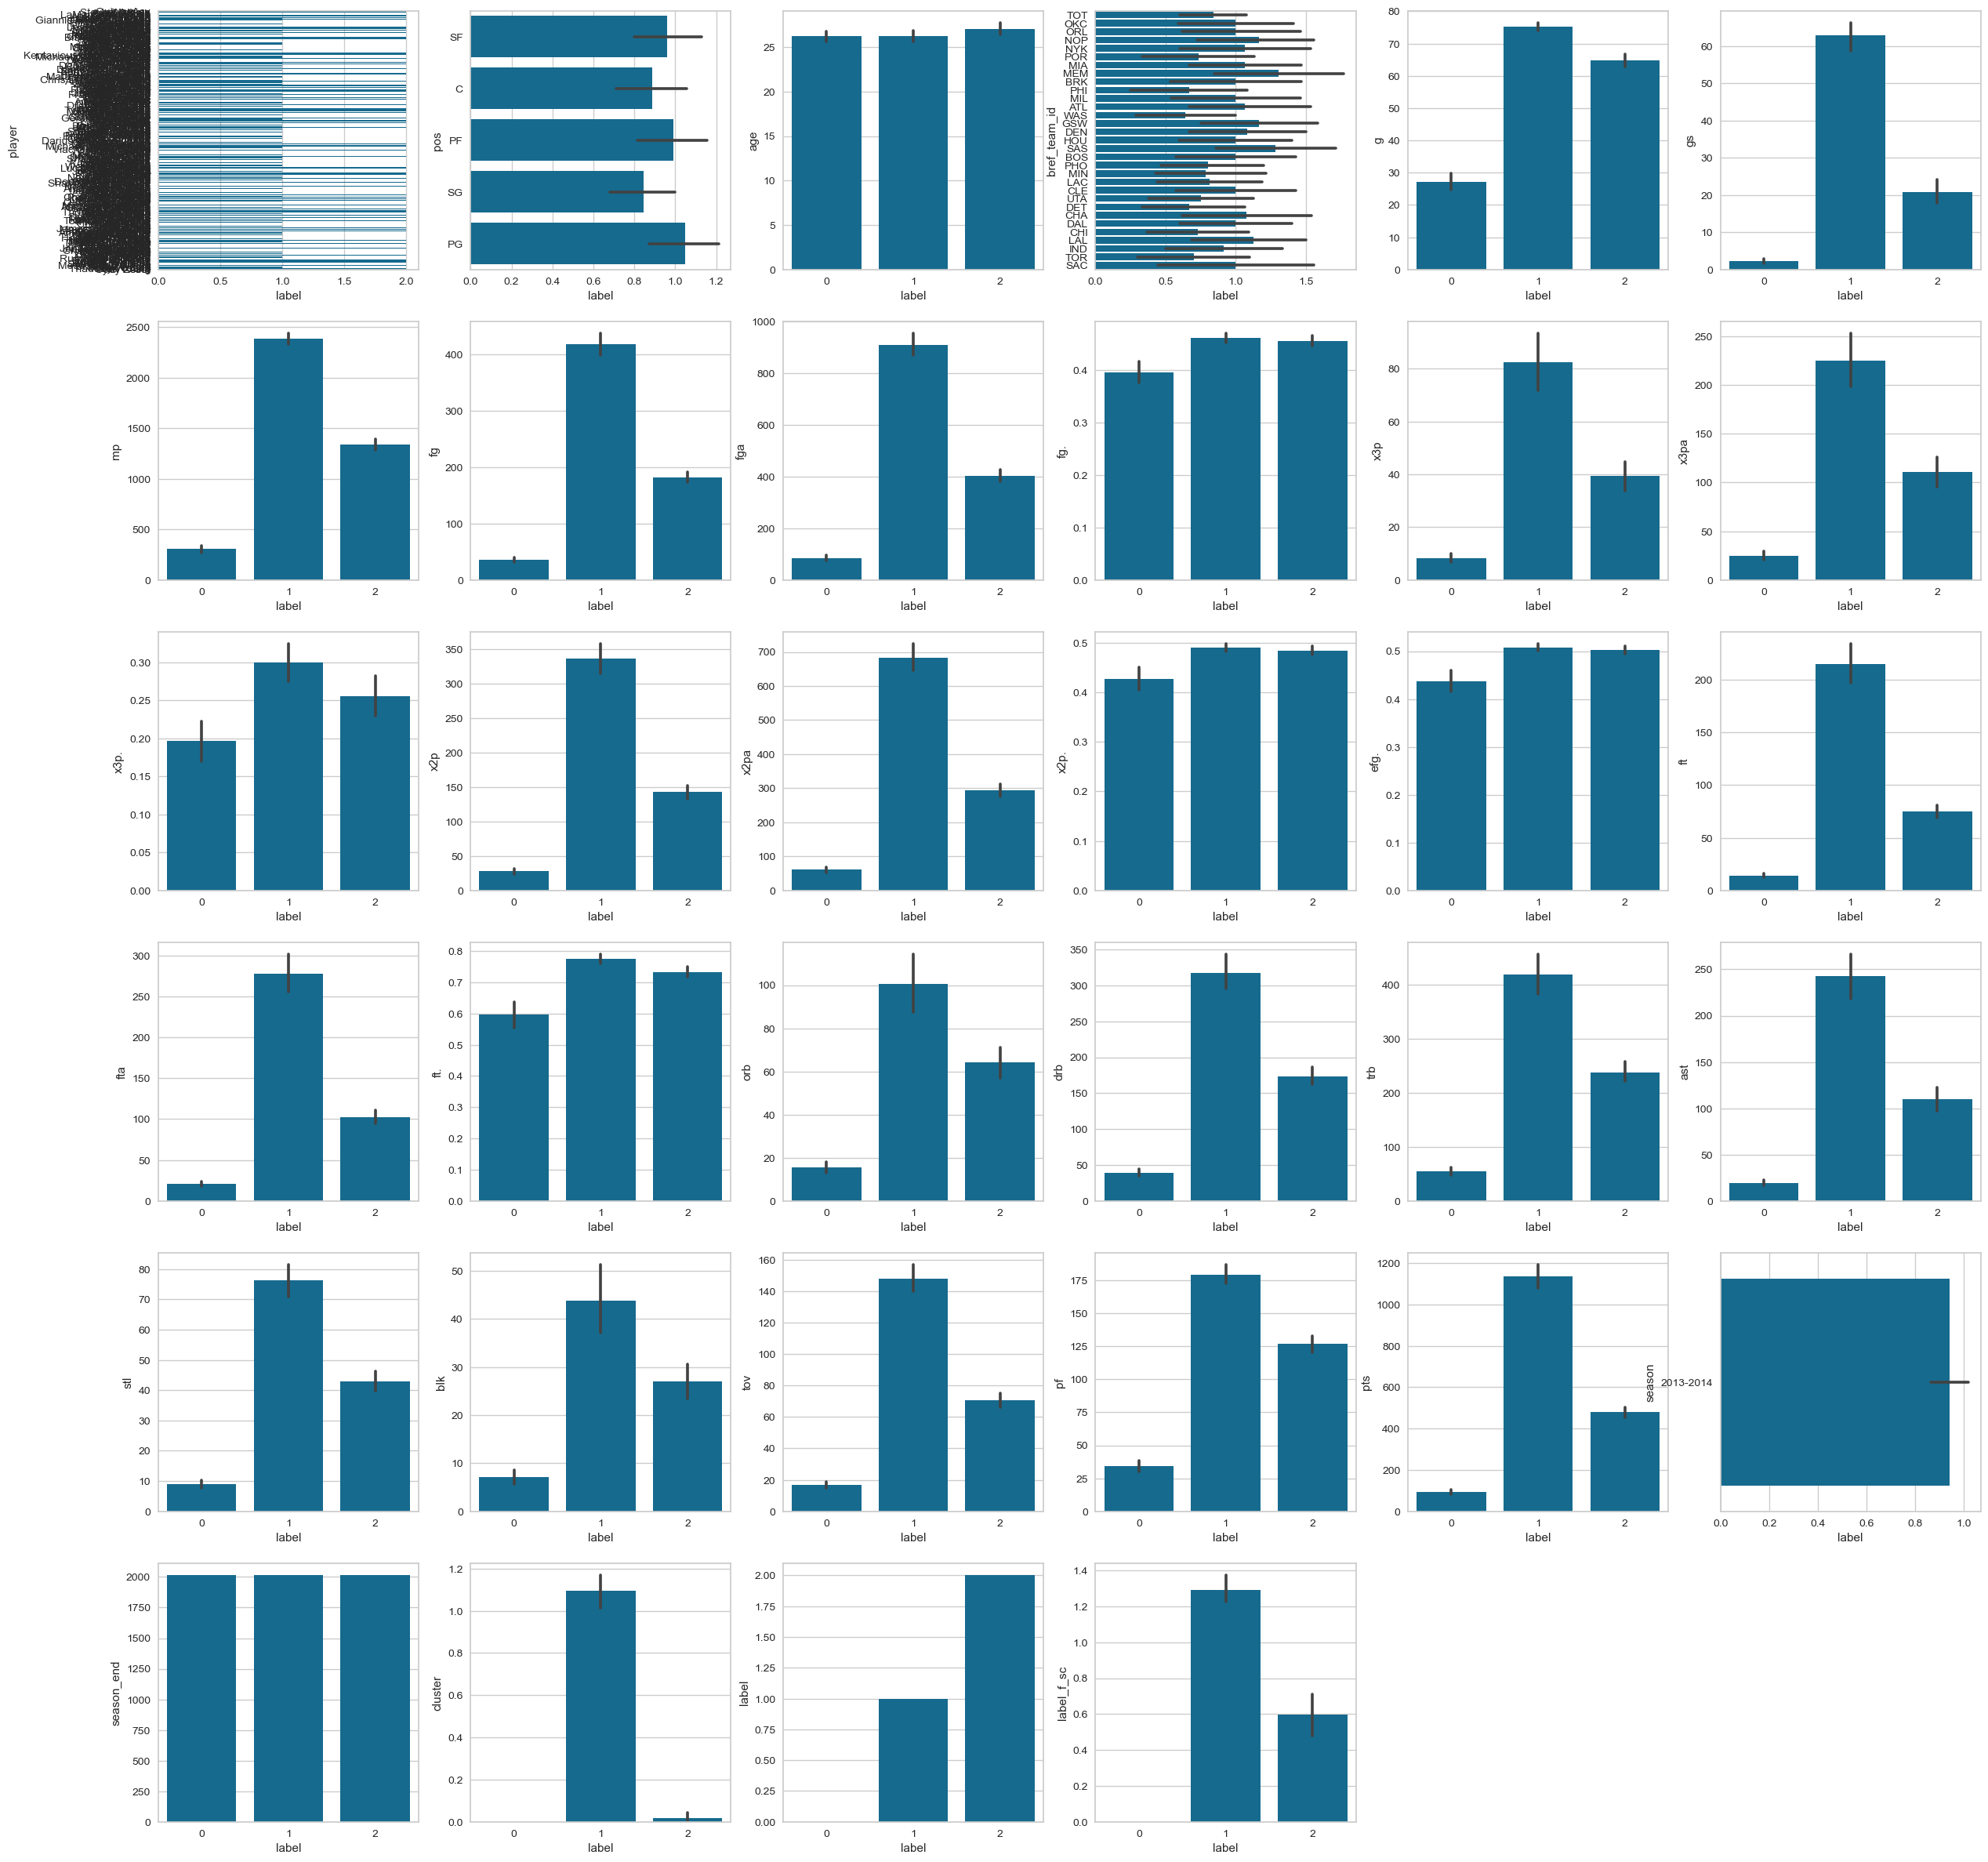

In [73]:
columns = list(df)

'''plotting: barplot'''
plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(6, 6, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    sns.barplot(x = df['label'], y = df[column], ax=ax)

plt.show()

In [74]:
mean_values = df.groupby('label').mean()

In [75]:
mean_values = df.groupby('label').mean().reset_index()

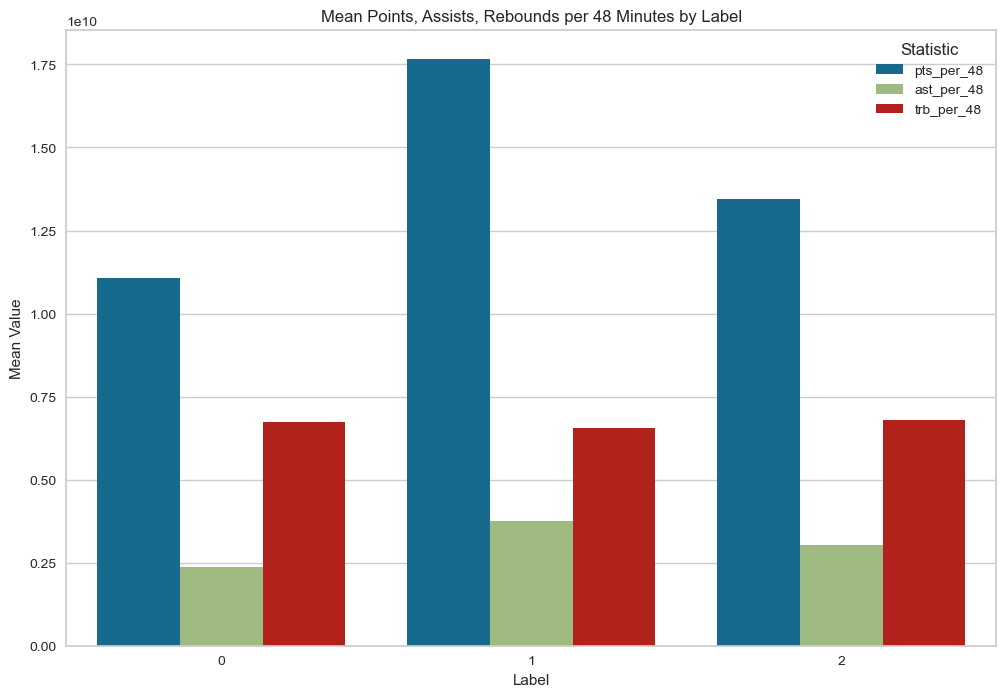

In [83]:
df['mp'] = df['mp'] / 60

df['pts_per_48'] = (df['pts'] / df['mp']) * 48
df['ast_per_48'] = (df['ast'] / df['mp']) * 48
df['trb_per_48'] = (df['trb'] / df['mp']) * 48

mean_values = df.groupby('label')[['pts_per_48', 'ast_per_48', 'trb_per_48']].mean().reset_index()

df_melted = pd.melt(mean_values, id_vars=['label'], value_vars=['pts_per_48', 'ast_per_48', 'trb_per_48'],
                     var_name='Statistic', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='label', y='Value', hue='Statistic', data=df_melted)
plt.title('Mean Points, Assists, Rebounds per 48 Minutes by Label')
plt.xlabel('Label')
plt.ylabel('Mean Value')
plt.show()


In [84]:
X_filtered = df[[col for col in df.columns if not col.endswith('.')]]


In [85]:
X_filtered

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,cluster,label,label_f_sc,pts_per_48,ast_per_48,trb_per_48
0,Quincy Acy,SF,23,TOT,63,0,0.000001,66,141,4,15,62,126,35,53,72,144,216,28,23,26,30,122,171,2013-2014,2013,0,0,0,7.535467e+09,1.233878e+09,9.518485e+09
1,Steven Adams,C,20,OKC,81,20,0.000002,93,185,0,0,93,185,79,136,142,190,332,43,40,57,71,203,265,2013-2014,2013,0,2,0,8.263218e+09,1.340824e+09,1.035241e+10
2,Jeff Adrien,PF,27,TOT,53,12,0.000001,143,275,0,0,143,275,76,119,102,204,306,38,24,36,39,108,362,2013-2014,2013,0,2,0,1.405991e+10,1.475903e+09,1.188490e+10
3,Arron Afflalo,SG,28,ORL,73,73,0.000003,464,1011,128,300,336,711,274,336,32,230,262,248,35,3,146,136,1330,2013-2014,2013,1,1,1,1.945219e+10,3.627175e+09,3.831935e+09
4,Alexis Ajinca,C,25,NOP,56,30,0.000001,136,249,0,1,136,248,56,67,94,183,277,40,23,46,63,187,328,2013-2014,2013,0,2,0,1.287333e+10,1.569918e+09,1.087168e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,0.000002,345,808,40,188,305,620,209,326,69,159,228,217,78,16,204,151,939,2013-2014,2013,1,1,1,1.985722e+10,4.588941e+09,4.821561e+09
477,Nick Young,SG,28,LAL,64,9,0.000002,387,889,135,350,252,539,235,285,29,137,166,95,46,12,95,156,1144,2013-2014,2013,1,1,1,2.359092e+10,1.959036e+09,3.423158e+09
478,Thaddeus Young,PF,25,PHI,79,78,0.000003,582,1283,90,292,492,991,163,229,166,310,476,182,167,36,165,213,1417,2013-2014,2013,2,1,1,1.945888e+10,2.499306e+09,6.536646e+09
479,Cody Zeller,C,21,CHA,82,3,0.000002,172,404,0,1,172,403,146,200,118,235,353,92,40,41,87,170,490,2013-2014,2013,0,2,2,1.291607e+10,2.425058e+09,9.304841e+09


In [86]:
model_kmeans = KMeans(n_clusters=5, random_state=0).fit(X_filtered)
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(X_filtered)
silhouette_avg = silhouette_score(X_filtered, model_kmeans.labels_)
visualizer.poof()
sillhouette_list.append(silhouette_avg)


ValueError: could not convert string to float: 'Quincy Acy'

In [88]:
df['label_f'] = model_kmeans.labels_

In [89]:
cluster_labels = {}

for label in df['label_f'].unique():
    cluster_df = df[df['label_f'] == label]
    avg_age = cluster_df['age'].mean()
    dominant_nationality = cluster_df['pos'].mode()[0]
    
    cluster_labels[label] = f'Cluster {label} - Average Age: {avg_age:.2f}, Dominant Position: {dominant_nationality}'


In [90]:
cluster_labels

{0: 'Cluster 0 - Average Age: 26.23, Dominant Position: SG',
 2: 'Cluster 2 - Average Age: 27.05, Dominant Position: PF',
 1: 'Cluster 1 - Average Age: 26.26, Dominant Position: PG'}

In [91]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_filtered)

ValueError: could not convert string to float: 'Quincy Acy'

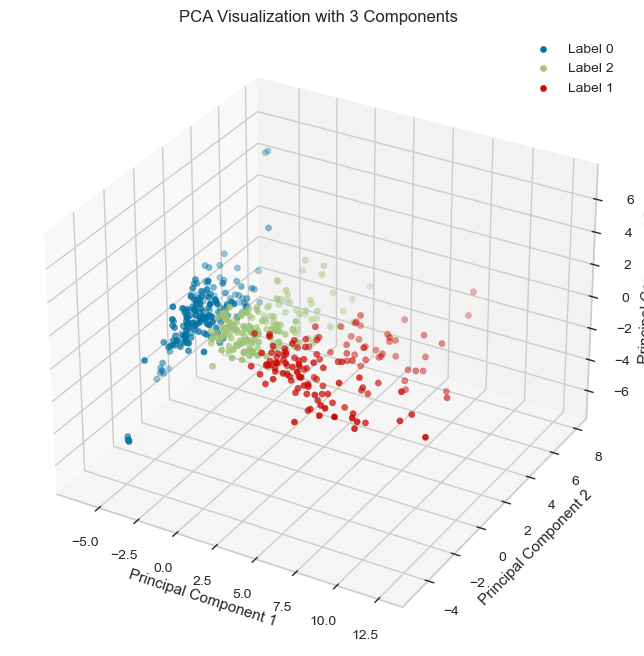

In [92]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df['label_f'].unique():
    indices = df[df['label_f'] == label].index
    ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('PCA Visualization with 3 Components')
plt.show()

In [93]:
ss = StandardScaler()

In [94]:
ss.fit(X)

X_scaled = ss.transform(X)


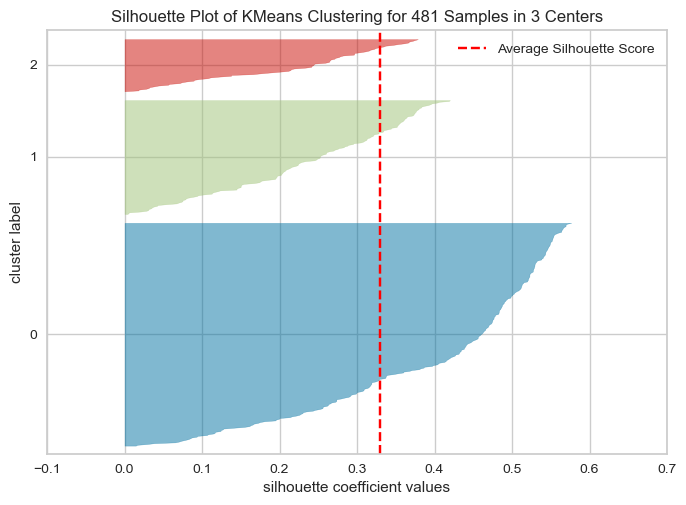

In [95]:
model_kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
silhouette_avg = silhouette_score(X_scaled, model_kmeans.labels_)
visualizer.poof()
sillhouette_list.append(silhouette_avg)

In [96]:
df['label_f_sc'] = model_kmeans.labels_

In [97]:
cluster_labels = {}

for label in df['label_f_sc'].unique():
    cluster_df = df[df['label_f_sc'] == label]
    avg_age = cluster_df['age'].mean()
    dominant_nationality = cluster_df['pos'].mode()[0]
    
    cluster_labels[label] = f'Cluster {label} - Average Age: {avg_age:.2f}, Dominant Position: {dominant_nationality}'


In [98]:
cluster_labels

{0: 'Cluster 0 - Average Age: 26.55, Dominant Position: SG',
 1: 'Cluster 1 - Average Age: 26.34, Dominant Position: PG',
 2: 'Cluster 2 - Average Age: 26.71, Dominant Position: PF'}

In [99]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

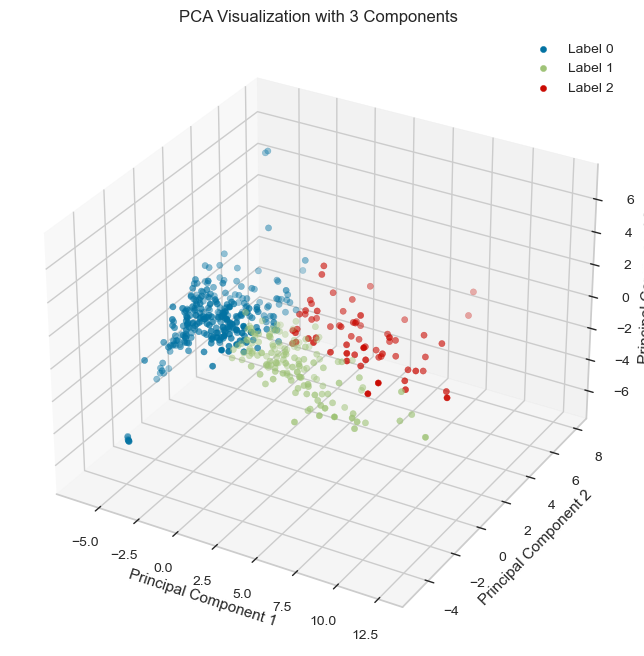

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df['label_f_sc'].unique():
    indices = df[df['label_f_sc'] == label].index
    ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Label {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('PCA Visualization with 3 Components')
plt.show()

In [101]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end,cluster,label,label_f_sc,pts_per_48,ast_per_48,trb_per_48,label_f
count,481.000000,481.000000,481.000000,4.810000e+02,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0,481.000000,481.000000,481.000000,4.810000e+02,4.810000e+02,4.810000e+02,481.000000
mean,26.509356,53.253638,25.571726,1.591289e-06,192.881497,424.463617,0.434622,39.613306,110.130977,0.245397,153.268191,314.332640,0.464035,0.478753,91.205821,120.642412,0.692380,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0,0.318087,0.941788,0.563410,1.373492e+10,2.975292e+09,6.697377e+09,0.941788
std,4.198265,25.322711,29.658465,1.153882e-06,171.832793,368.850833,0.102401,50.855639,132.751732,0.176482,147.223161,294.174554,0.110433,0.104059,103.667725,131.240639,0.213133,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0,0.552141,0.844554,0.719253,5.721333e+09,2.223676e+09,3.715358e+09,0.844554
min,19.000000,1.000000,0.000000,1.286008e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,32.000000,0.000000,4.989712e-07,47.000000,110.000000,0.400000,0.000000,3.000000,0.000000,31.000000,67.000000,0.433824,0.451000,16.000000,22.000000,0.640000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0,0.000000,0.000000,0.000000,1.040570e+10,1.423403e+09,3.906966e+09,0.000000
50%,26.000000,61.000000,10.000000,1.467335e-06,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,110.000000,227.000000,0.473779,0.487000,53.000000,73.000000,0.750000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0,0.000000,1.000000,0.000000,1.344553e+10,2.280108e+09,6.023523e+09,1.000000
75%,29.000000,76.000000,54.000000,2.592593e-06,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,230.000000,459.000000,0.513120,0.525000,126.000000,179.000000,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0,1.000000,2.000000,1.000000,1.688071e+10,3.872278e+09,8.858885e+09,2.000000
max,39.000000,83.000000,82.000000,4.014918e-06,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0,2.000000,2.000000,2.000000,7.464960e+10,1.357265e+10,3.732480e+10,2.000000


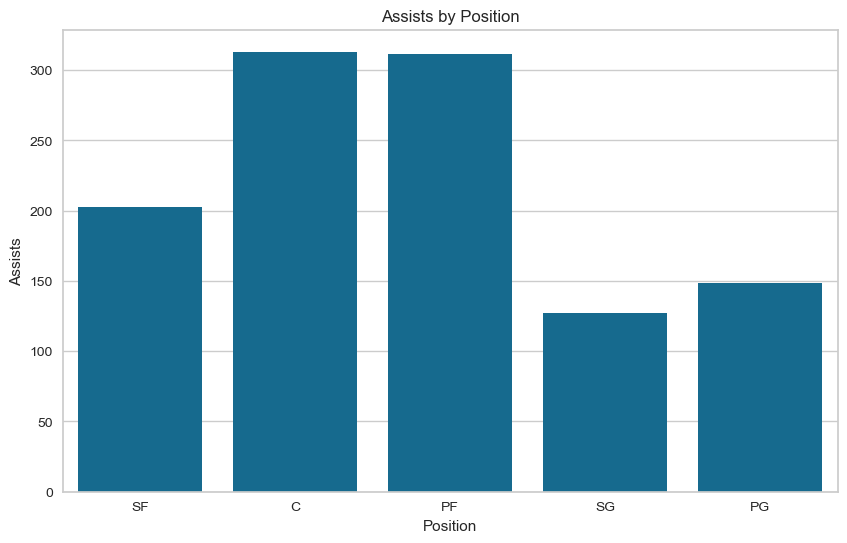

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pos', y='trb', data=df, ci=None)
plt.title('Assists by Position')
plt.xlabel('Position')
plt.ylabel('Assists')
plt.show()

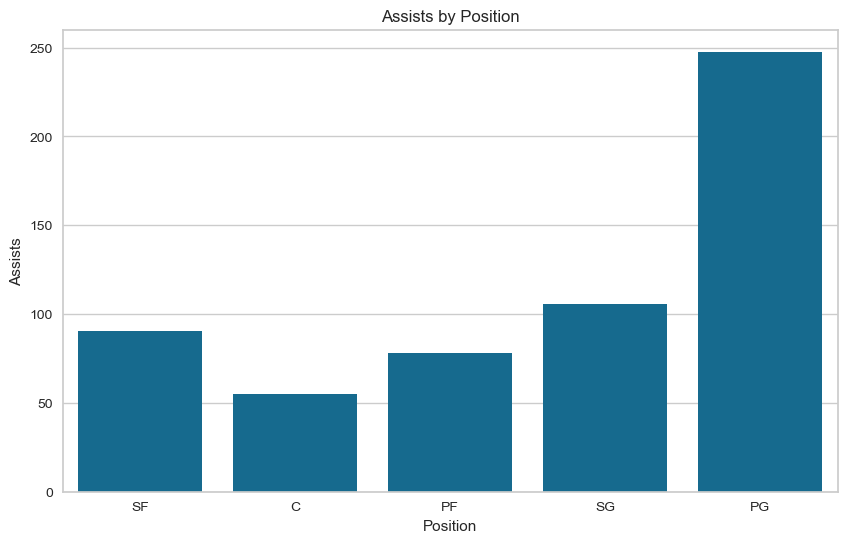

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pos', y='ast', data=df, ci=None)
plt.title('Assists by Position')
plt.xlabel('Position')
plt.ylabel('Assists')
plt.show()

In [104]:
df['pos']=df['pos'].replace('G','SF')
df['pos']=df['pos'].replace('F','PF')


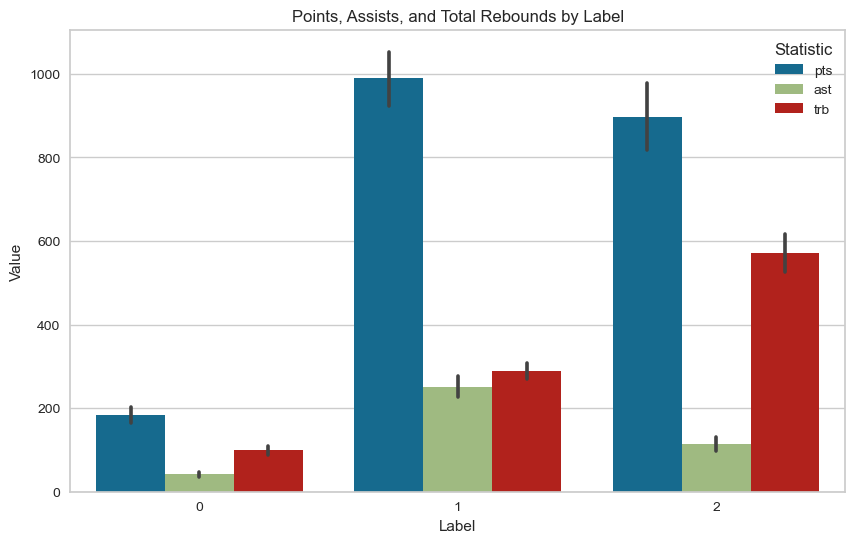

In [105]:
df_melted = pd.melt(df, id_vars=['label_f_sc'], value_vars=['pts', 'ast', 'trb'],
                     var_name='Statistic', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='label_f_sc', y='Value', hue='Statistic', data=df_melted)
plt.title('Points, Assists, and Total Rebounds by Label')
plt.xlabel('Label')
plt.ylabel('Value')
plt.show()
